<a id='top'></a>
# Quality Prediction in Mining Process

## Contents

1. <a href=#intro>Introduction</a>
    1. <a href=#businessproblems>Business Problems</a>
    1. <a href=#projecttarget>Project Deliverables</a>
1. <a href=#datapre>Data Preprocessing</a>
    1. <a href=#dataoverview>Mining Data Overview</a>
    1. <a href=#analysis>Time Series Data Anaylysis And Precessing</a>
    1. <a href=#outliers>Outliers Handling</a>
    1. <a href=#splitandtest>Split To Train And Test</a>
    1. <a href=#normalize>Data Normalization</a>
    1. <a href=#pca>Principle Component Analysis</a>
1. <a href=#trainandtest>Data Training and Testing</a>
    1. <a href=#linear>Linear Regression Model</a>
    1. <a href=#ridege>Ridege Regression Model</a>
    1. <a href=#huber>Huber Regression Model</a>
    1. <a href=#knn>KNN Regression Model</a>
    1. <a href=#decision>Decision Tree Regression Model</a>
    1. <a href=#rfr>Random Forest Regression Model</a>
    1. <a href=#neural>Neural Network Regression Model</a>
1. <a href=#predict>Data Prediction and Mining Process Improvement</a>
    1. <a href=#pre>Data Prediction with Random Forest Model</a>
    1. <a href=#imp>Mining Process Improvement</a>
1. <a href=#con>Conclusion</a>
1. <a href=#fur>Further Improvement</a>

<a id='intro'></a>
## 1. Introduction
<a href=#top>(back to top)</a>

<a id='businessproblems'></a>
### Business Problems
The main goal is to use this data to predict how much impurity is in the ore concentrate. As this impurity is measured every hour, if we can predict how much silica (impurity) is in the ore concentrate, we can help the engineers, giving them early information to take actions (empowering!). Hence, they will be able to take corrective actions in advance (reduce impurity, if it is the case) and also help the environment (reducing the amount of ore that goes to tailings as you reduce silica in the ore concentrate).

Data source: https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process

<a id='projecttarget'></a>
### Project Delivertbles
1, Mining data visulization and correlation analysis.\
2, Set up regression models to predict the purity of Iron Concentrate and Silica Concentrate.\
3, Develop the best prediction model to forecast the product purity to help improve production process and enhance efficiency.

<a id='datapre'></a>
## 2. Data Preprocessing
<a href=#top>(back to top)</a>

In [2]:
import numpy as np
import pandas as pd
from numpy import inf
from numpy import zeros

import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
from time import time

from matplotlib.pyplot import MultipleLocator
from numpy.linalg import eig

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
# For Regression Algorithm Library Based On Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor

# For Model Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# For Splitting Data In Training And Testing
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score


<a id='dataoverview'></a>
### Mining Data Overview

Read data from csv file.

In [3]:
# Reading data from csv file
mining_data = pd.read_csv('../Team Project/Datasets/MiningProcess_Flotation_Plant_Database.csv', decimal = ',')

In [4]:
mining_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [5]:
#Data shape (rows, columns)
mining_data.shape

(737453, 24)

In [6]:
mining_data['date'] = pd.to_datetime(mining_data['date'])

In [7]:
#The first 5 rows of dataset
mining_data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


<a id='analysis'></a>
### Time series data anaylysis and precessing

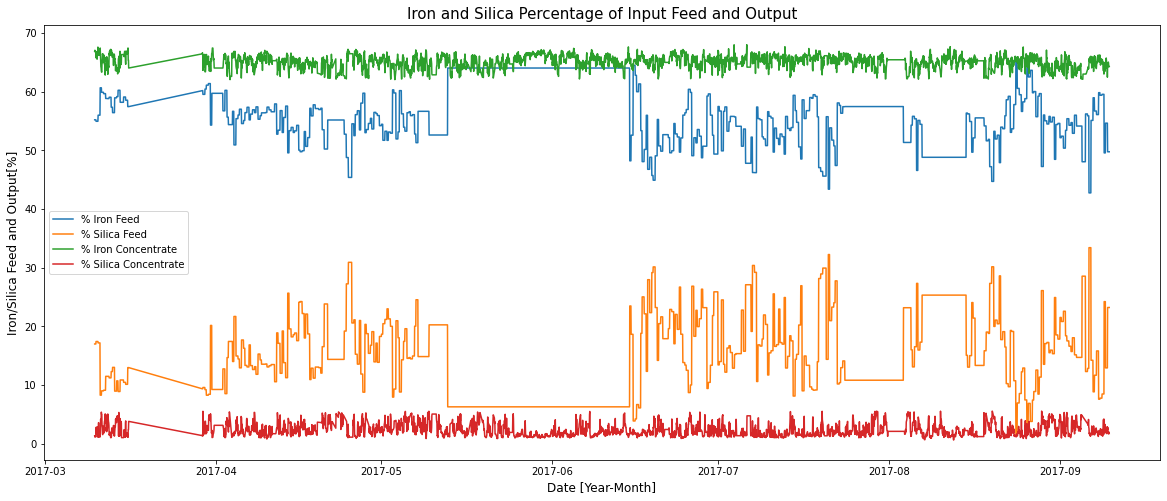

In [8]:
#Time series data oveview
df = mining_data.groupby('date').mean()
plt.figure(figsize = (20,8))
plt.plot(df.index, df['% Iron Feed'], label = '% Iron Feed')
plt.plot(df.index, df['% Silica Feed'], label = '% Silica Feed')
plt.plot(df.index, df['% Iron Concentrate'], label = '% Iron Concentrate')
plt.plot(df.index, df['% Silica Concentrate'], label = '% Silica Concentrate')


plt.title('Iron and Silica Percentage of Input Feed and Output', size = 15)
plt.ylabel('Iron/Silica Feed and Output[%]', size = 12)
plt.xlabel('Date [Year-Month]', size = 12)
plt.legend()
plt.show()

In [9]:
df.shape

(4097, 23)

There is real breakdown in the plant between the middle and end of March 2017 accoding to the slash in the chart above, to be exact, the breakdown time is from '2017-03-16 5:00' to '2017-03-29 12:00', so there is no data between this period.

What's more, there is a flat line between '2017-05-13 01:00:00' to '2017-06-15 00:00:00' accroding to the original dataset, the percentage of silica feed and iron feed in this period remains unchanged, it would be a misleading for data analysis using this part of data, so they are removed before data processing. 


In [10]:
mining_data_cut = mining_data[(mining_data['date'] < '2017-05-13 01:00:00') | (mining_data['date'] > '2017-06-15 00:00:00')]

In [11]:
mining_data.shape

(737453, 24)

In [12]:
b = mining_data_cut.groupby('date').mean()

In [13]:
b.shape

(3305, 23)

There are 594,893 rows remaining after removing the data of the flat line.

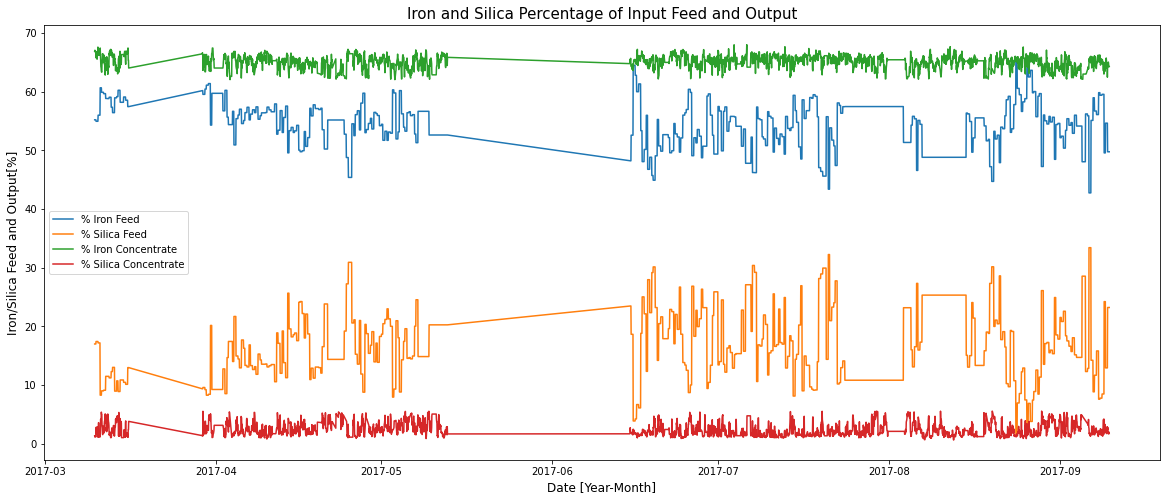

In [14]:
df = mining_data_cut.groupby('date').mean()
plt.figure(figsize = (20,8))
plt.plot(df.index, df['% Iron Feed'], label = '% Iron Feed')
plt.plot(df.index, df['% Silica Feed'], label = '% Silica Feed')
plt.plot(df.index, df['% Iron Concentrate'], label = '% Iron Concentrate')
plt.plot(df.index, df['% Silica Concentrate'], label = '% Silica Concentrate')


plt.title('Iron and Silica Percentage of Input Feed and Output', size = 15)
plt.ylabel('Iron/Silica Feed and Output[%]', size = 12)
plt.xlabel('Date [Year-Month]', size = 12)
plt.legend()
plt.show()

<a id='outliers'></a>
### Outliers Handling

Define functions to get the upper whisker and lower whisker value of data in each column.

In [15]:
def quantile_up(data1):
    
    #1st quantile - 25%
    Q1 = data1.quantile(0.25)
    #3rd quantile - 75%
    Q3 = data1.quantile(0.75)
    #Interquantile range - IQR
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    upper_whisker = data1[data1<=Q3+1.5*IQR].max()
    
    return (upper_whisker)
#upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
#lower_whisker = data[data>=lower_quartile-1.5*iqr].min()

def quantile_down(data2):
    
    #1st quantile - 25%
    Q1 = data2.quantile(0.25)
    #3rd quantile - 75%
    Q3 = data2.quantile(0.75)
    #Interquantile range - IQR
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    lower_whisker = data2[data2>=Q1-1.5*IQR].min()
    
    return (lower_whisker)


#### Detect outliers of each column and plot in boxplot.

The blue dotted lines represent the maxinum and mininum values of the dataset boxplots. There are many outliers (red points) in each cloumn, one data cleansing method is to remove these outliers before data processing.

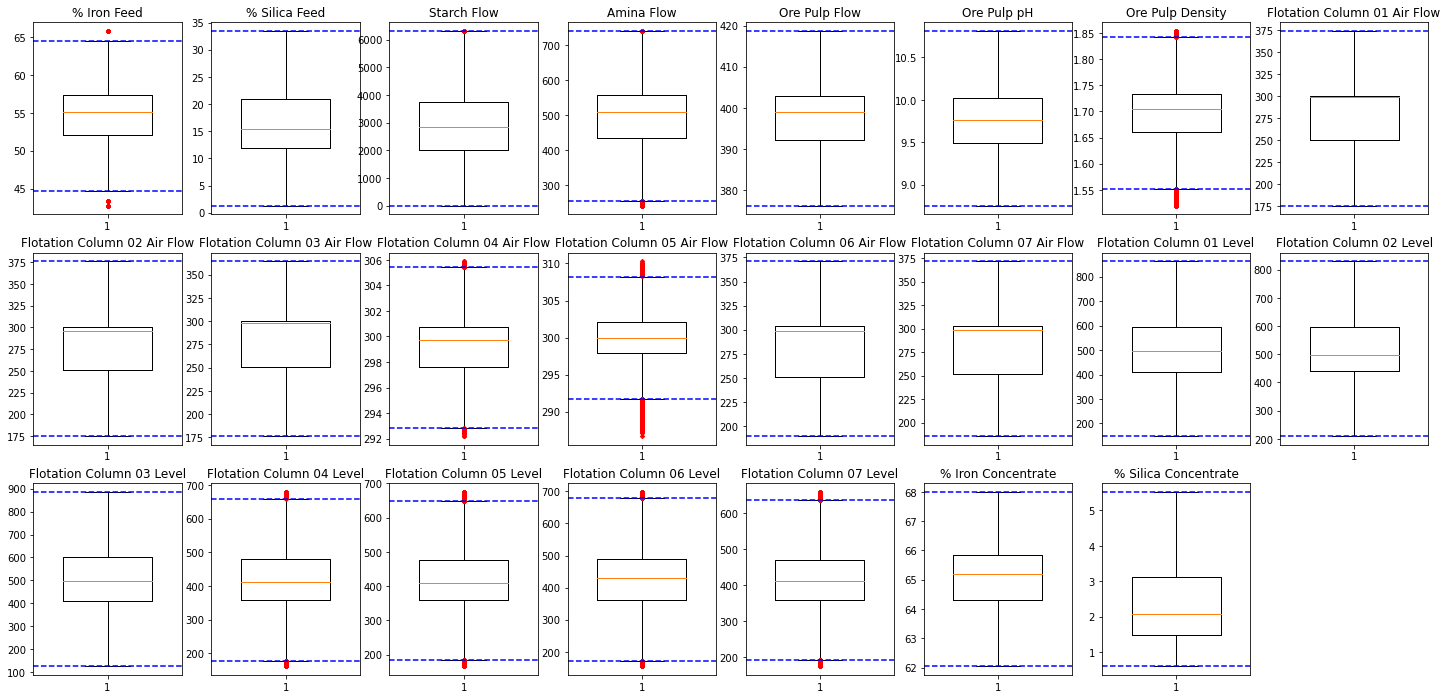

In [16]:
plt.figure(figsize=(25,12))
for x in range(23):
    plt.subplot(3,8,x+1)
    plt.boxplot(mining_data_cut.iloc[:,x+1], whis = 1.5, widths = 0.6, flierprops = {'marker':'D', 'markerfacecolor':'red', 
                                                                  'markeredgecolor':'red', 'markersize':3})
    plt.axhline(y = quantile_up(mining_data_cut.iloc[:,x+1]), color='b', linestyle='--')
    plt.axhline(y = quantile_down(mining_data_cut.iloc[:,x+1]), color='b', linestyle='--')
    plt.title(mining_data_cut.columns[x+1])

#### Remove outliers and return the new data shape (rows, columns).

In [17]:
mining_data_rem = mining_data_cut.copy()

In [18]:
mining_data_rem = mining_data_rem.drop('date', axis = 1)

In [19]:
#1st quantile - 25%
Q1 = mining_data_rem.quantile(0.25)
#3rd quantile - 75%
Q3 = mining_data_rem.quantile(0.75)
#Interquantile range - IQR
IQR = Q3 - Q1

In [20]:
mining_data_rem = mining_data_rem[~((mining_data_rem < (Q1 - 1.5 * IQR)) | \
                                            (mining_data_rem > (Q3 + 1.5 * IQR))).any(axis=1)]
print(mining_data_rem.shape)

(496896, 23)


dataset without moving the straitline period data in the chart.

In [21]:
mining_data_rem1 = mining_data.copy()
mining_data_rem1 = mining_data_rem1.drop('date', axis = 1)
mining_data_rem1 = mining_data_rem1[~((mining_data_rem1 < (Q1 - 1.5 * IQR)) | \
                                            (mining_data_rem1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(mining_data_rem1.shape)
print('There are {:.2%} data left'.format((mining_data_rem1.iloc[:,0].count()/mining_data.iloc[:,0].count()).round(4)))

(620579, 23)
There are 84.15% data left


There are 496,896 rows left after handling the outliers.

In [22]:
#df_out=df_out.drop(labels = 'date', axis = 1)
mining_data_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 496896 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   496896 non-null  float64
 1   % Silica Feed                 496896 non-null  float64
 2   Starch Flow                   496896 non-null  float64
 3   Amina Flow                    496896 non-null  float64
 4   Ore Pulp Flow                 496896 non-null  float64
 5   Ore Pulp pH                   496896 non-null  float64
 6   Ore Pulp Density              496896 non-null  float64
 7   Flotation Column 01 Air Flow  496896 non-null  float64
 8   Flotation Column 02 Air Flow  496896 non-null  float64
 9   Flotation Column 03 Air Flow  496896 non-null  float64
 10  Flotation Column 04 Air Flow  496896 non-null  float64
 11  Flotation Column 05 Air Flow  496896 non-null  float64
 12  Flotation Column 06 Air Flow  496896 non-nul

Histogram comparison of each attribute between the dataset before and after data cleansing.\
Blue charts stand for the data before cleansing and orange stand for after cleansing.

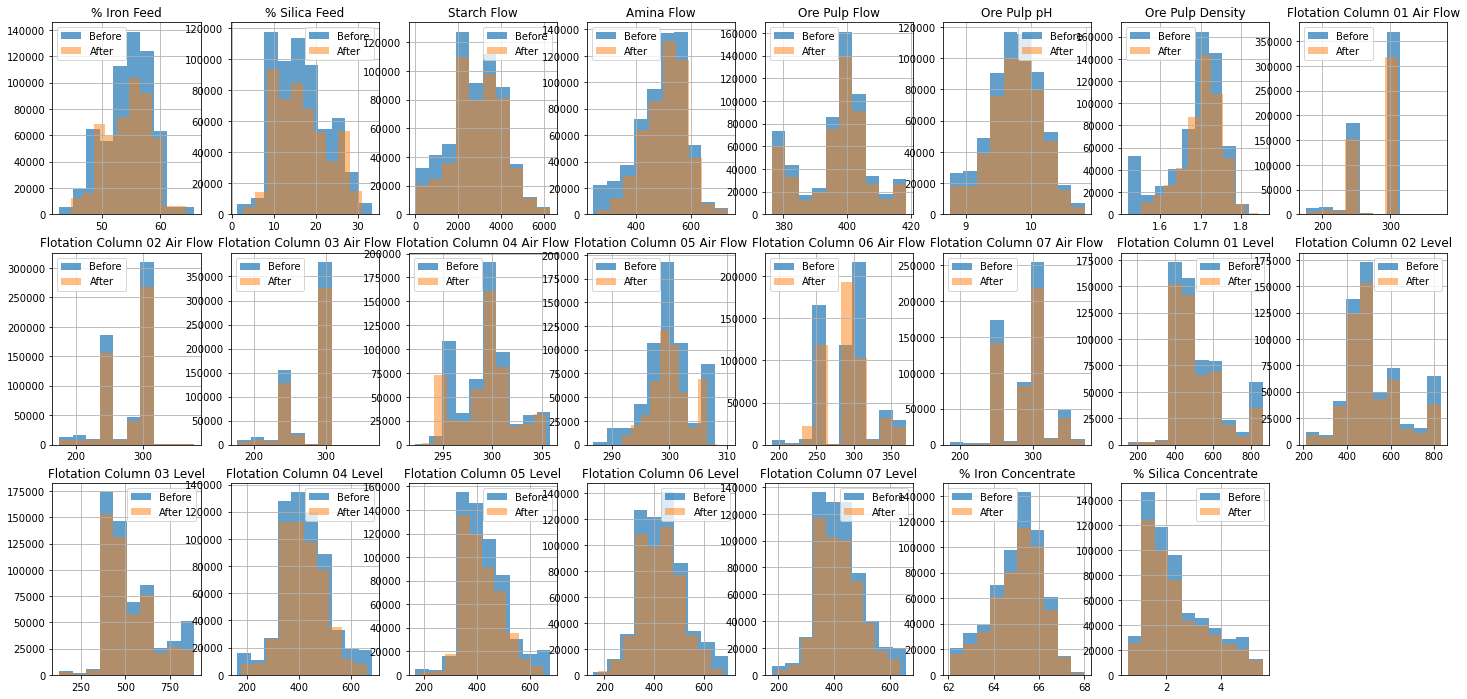

In [23]:
plt.figure(figsize=(25,12))
for x in range(23):
    plt.subplot(3,8,x+1)
    mining_data_cut.iloc[:,x+1].hist(alpha = 0.7)
    mining_data_rem.iloc[:,x].hist(alpha = 0.5)
    plt.legend(['Before', 'After'])
    plt.title(mining_data_rem.columns[x])

Boxplots of each attribute in the dataset after data cleansing.\
The blue dotted lines represent the maxinum and mininum values of dataset boxplot before cleansing, it is obvious that all the outliers are removed compared with the original data.

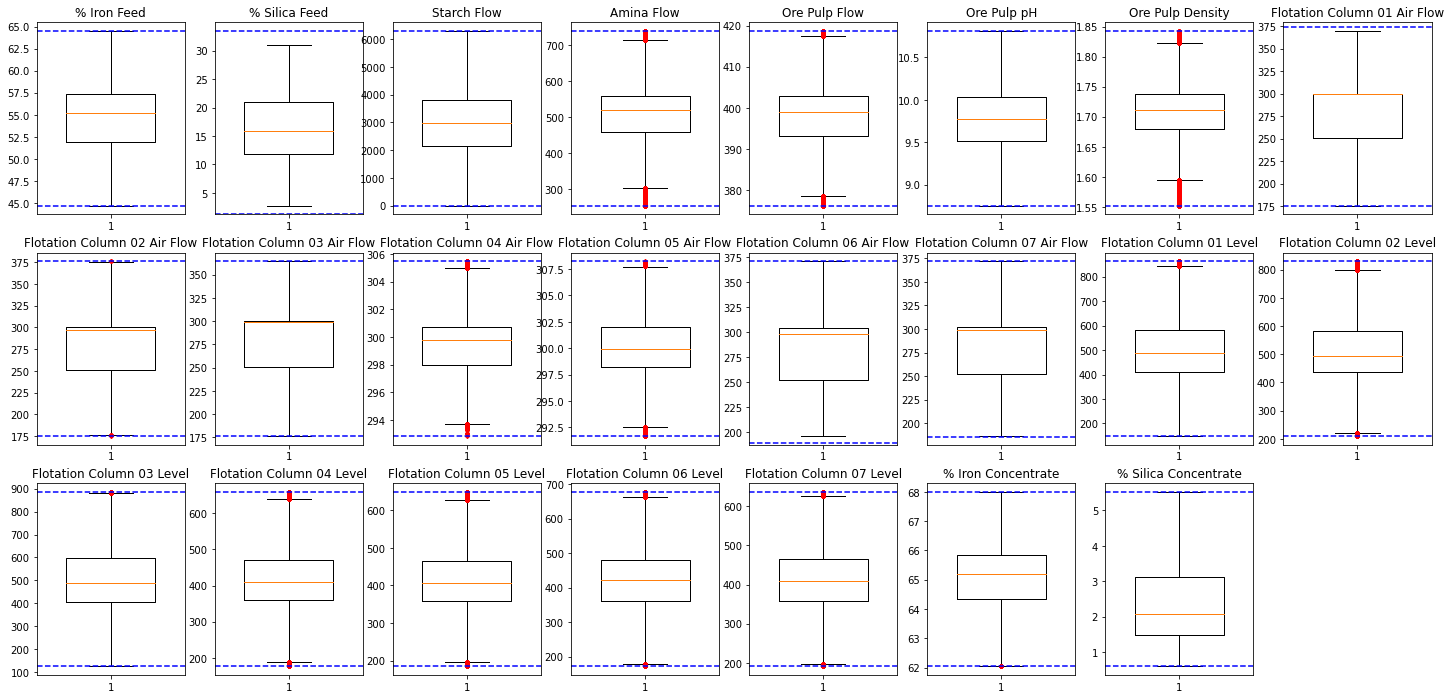

In [24]:
plt.figure(figsize=(25,12))
for x in range(23):
    plt.subplot(3,8,x+1)
    plt.boxplot(mining_data_rem.iloc[:,x], whis = 1.5, widths = 0.6, flierprops = {'marker':'D', 'markerfacecolor':'red', 
                                                                  'markeredgecolor':'red', 'markersize':3})
    plt.axhline(y = quantile_up(mining_data_cut.iloc[:,x+1]), color='b', linestyle='--')
    plt.axhline(y = quantile_down(mining_data_cut.iloc[:,x+1]), color='b', linestyle='--')
    plt.title(mining_data_cut.columns[x+1])

#### Data Size Change After Data Cleansing.
There is 83.53% data left after data cleansing.

In [25]:
# Data size - before cleansing vs after cleansing
before = mining_data_cut.iloc[:, 1].count()
after = mining_data_rem.iloc[:, 0].count()
#after1 = mining_data.iloc[:, 0].count()
print('Data size change after cleansing: {:.2%}'.format(after/before))
#print('Data size change after cleansing: {:.2%}'.format(after/after1))

Data size change after cleansing: 83.53%


In [26]:
#mining_data_sam_rem = mining_data_sam_rem.astype('category')
#mining_data_sam_rem = mining_data_sam_rem.drop(labels = 'date', axis = 1)
mining_data_rem.dtypes

% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

In [27]:
#data_orange = mining_data_rem.sample(frac = 0.01)

In [28]:
#data_orange.to_csv('C:/Users/Chao/Documents/NUS/Industry 4.0 (Msc)/Module info/IND5022 Data Analysis for Smart Manufacturing/Team Project/Datasets/data_orange.csv')

In [29]:
#mining_data_sam_rem=pd.DataFrame(mining_data_sam_rem,dtype=np.float)

#### Correlation(Pearson) matrix heatmap among each attribute.

Text(0.5, 1.0, 'Correlation Map Between Variables')

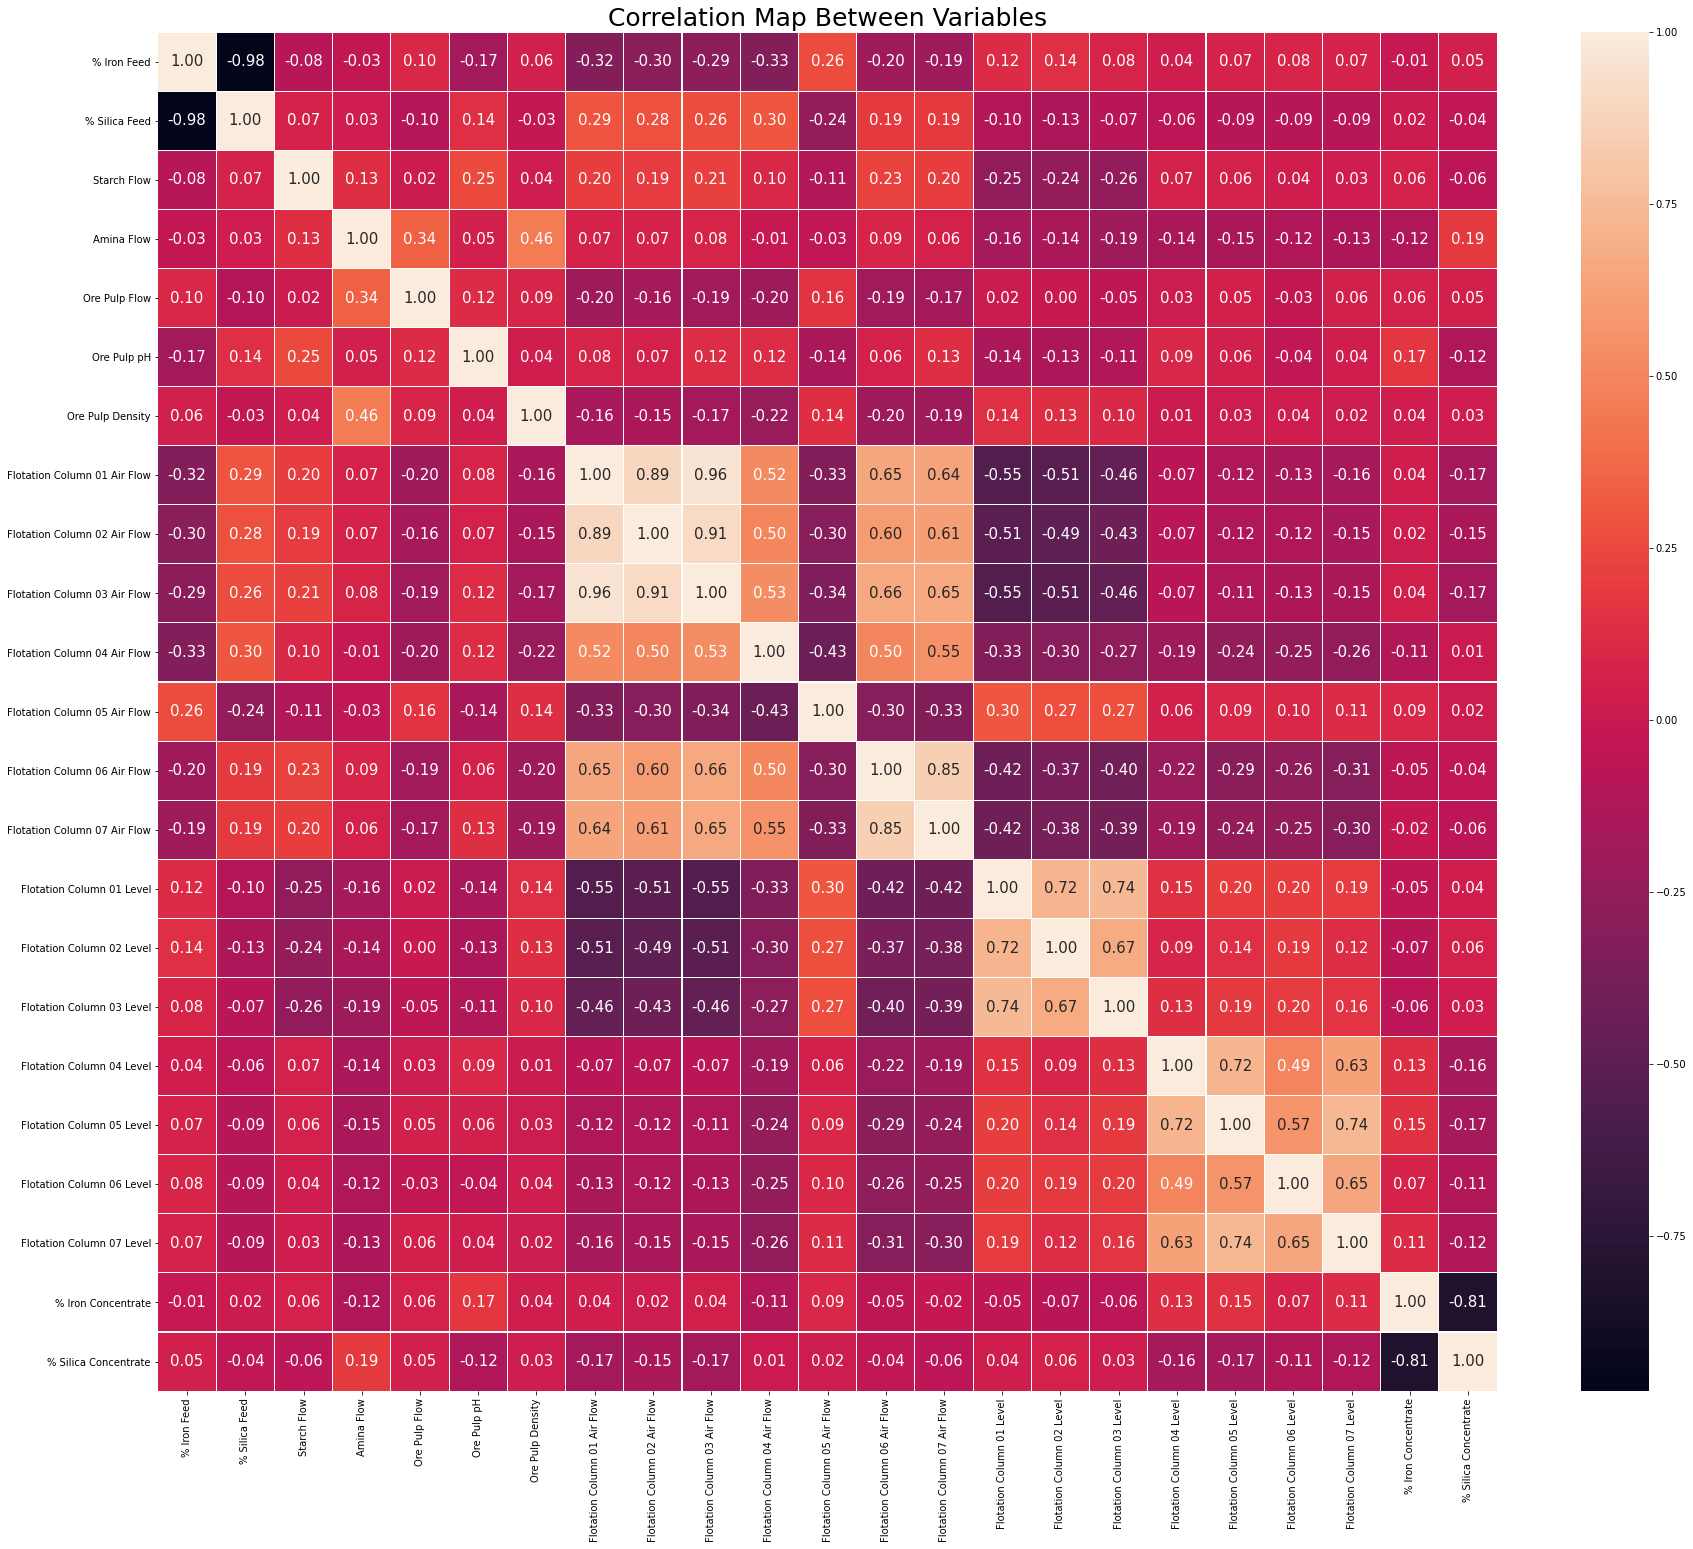

In [30]:
plt.figure(figsize=(30, 25))
sns.heatmap(mining_data_rem.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = 0.1, linecolor= 'white', \
           annot_kws={'size':15})
plt.title('Correlation Map Between Variables', fontsize = 25)

#### Correlation(Pearson) of % Iron concentrate and % Silica Concentrate with other attributes.

In [31]:
data_corr = mining_data_rem.corr(method = 'pearson').round(2)
data_corr[['% Iron Concentrate', '% Silica Concentrate']]\
.sort_values('% Iron Concentrate', ascending = False)#.drop(['% Iron Concentrate', '% Silica Concentrate'], axis = 0)

,% Iron Concentrate,% Silica Concentrate
% Iron Concentrate,1.00,-0.81
Ore Pulp pH,0.17,-0.12
Flotation Column 05 Level,0.15,-0.17
Flotation Column 04 Level,0.13,-0.16
Flotation Column 07 Level,0.11,-0.12
Flotation Column 05 Air Flow,0.09,0.02
Flotation Column 06 Level,0.07,-0.11
Starch Flow,0.06,-0.06
Ore Pulp Flow,0.06,0.05
Ore Pulp Density,0.04,0.03


#### Correlation(Pearson) charts of % Iron concentrate and % Silica Concentrate with other attributes.

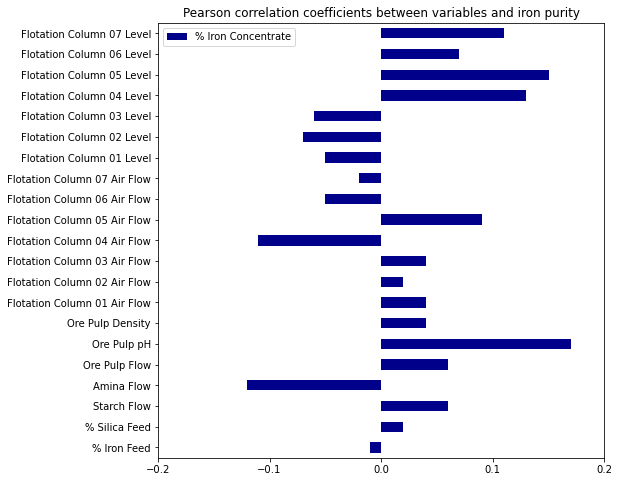

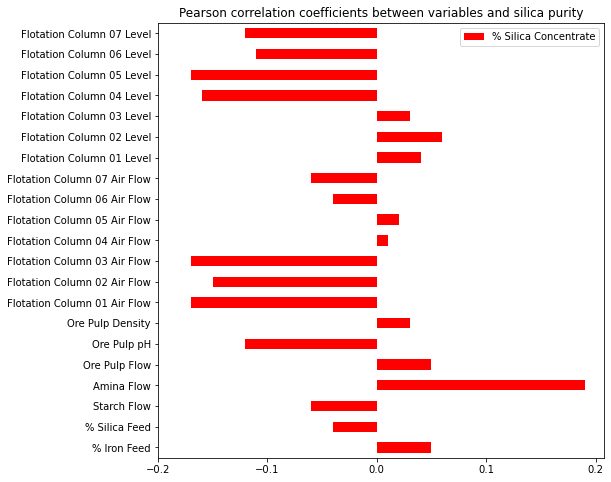

In [32]:
df1 = data_corr[['% Iron Concentrate']].drop(['% Iron Concentrate','% Silica Concentrate'], axis = 0)
df2 = data_corr[['% Silica Concentrate']].drop(['% Iron Concentrate','% Silica Concentrate'], axis = 0)
#df3 = data_corr[['% Iron Concentrate', '% Silica Concentrate']].drop(['% Iron Concentrate','% Silica Concentrate'], axis = 0)
df1.plot(kind = 'barh', title = 'Pearson correlation coefficients between variables and iron purity',\
         color = 'darkblue', figsize = (8, 8), xticks = (-0.2,-0.1, 0 ,0.1,0.2))
df2.plot(kind = 'barh', title = 'Pearson correlation coefficients between variables and silica purity',\
         color = 'red', figsize = (8, 8), xticks = (-0.2, -0.1, 0 ,0.1,0.2))
#df3.plot(kind = 'barh', figsize = (8, 8))

<a id='splitandtest'></a>
### Split Data To Train and Test

Spliting data for training and testing, trained data size is 80% and test data size is 20%.

In [33]:
y = mining_data_rem['% Iron Concentrate']
x = mining_data_rem.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [34]:
target = y
train = x

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

<a id='normalize'></a>
### Data Normalization

In [35]:
## Performing standardization before applying PCA
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
np.mean(x_train), np.std(x_train)

(2.1878302797791503e-16, 1.0000000000000004)

<a id='pca'></a>
### Principle Component Analysis

In [37]:
pca_mining = PCA()
x_train = pca_mining.fit_transform(x_train)
x_test = pca_mining.transform(x_test)

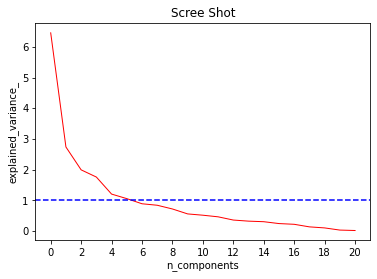

Explained variation (Eigenvalue) per principal component: [6.45390412 2.73982531 1.99578893 1.76168505 1.20726251 1.05917689
 0.89206463 0.84387375 0.72262406 0.56187483 0.51985694 0.46734772
 0.3624372  0.32674964 0.30854299 0.24783801 0.22409629 0.14054701
 0.10646423 0.03611458 0.02197815]


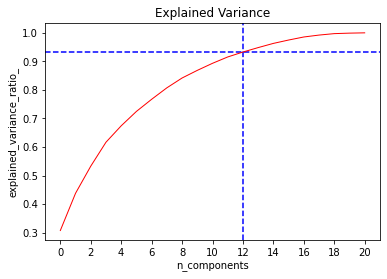

In [38]:
#plt.figure(figsize = (18,5))
#plt.plot(pca_mining.explained_variance_ratio_, 'k', linewidth=1, color = 'red')

plt.plot(pca_mining.explained_variance_, 'k', linewidth = 1, color = 'red')
x_values = list(range(23))
x_major_locator = MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.axhline(y = 1, color = 'blue', linestyle = '--')
plt.title('Scree Shot')
plt.show()


print('Explained variation (Eigenvalue) per principal component: {}'.format(pca_mining.explained_variance_))


x_values = list(range(23))
x_major_locator = MultipleLocator(2)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.axhline(y = 0.9327, color = 'blue', linestyle = '--')
plt.axvline(x = 12, color = 'blue', linestyle = '--')
plt.plot(np.cumsum(pca_mining.explained_variance_ratio_), 'k', linewidth = 1, color = 'red')
plt.title('Explained Variance')
plt.show()

In [39]:
print('Explained variation ratio per principal component: {}'.format(pca_mining.explained_variance_ratio_))
print()
print('The sum of the top "12" variance ratio is: {:.2%}'.format(sum(pca_mining.explained_variance_ratio_[0:12]).round(4)))

Explained variation ratio per principal component: [0.30732799 0.13046754 0.09503733 0.08388955 0.05748855 0.05043687
 0.04247916 0.04018436 0.03441058 0.02675588 0.02475503 0.0222546
 0.01725887 0.01555947 0.01469249 0.01180178 0.01067122 0.0066927
 0.00506971 0.00171974 0.00104658]

The sum of the top "12" variance ratio is: 91.55%


In [40]:
loadings = pca_mining.components_.T * np.sqrt(pca_mining.explained_variance_)

In [41]:
x.columns

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level'],
      dtype='object')

In [42]:
loading_matrix = pd.DataFrame(loadings, columns=['com1','com2','com3','com4','com5','com6','com7','com8','com9','com10','com11',\
                                                 'com12','com13','com14','com15','com16','com17','com18','com19','com20','com21'],\
                              index=x.columns)


Text(0.5, 1.0, 'Loading Matrix Heatmap')

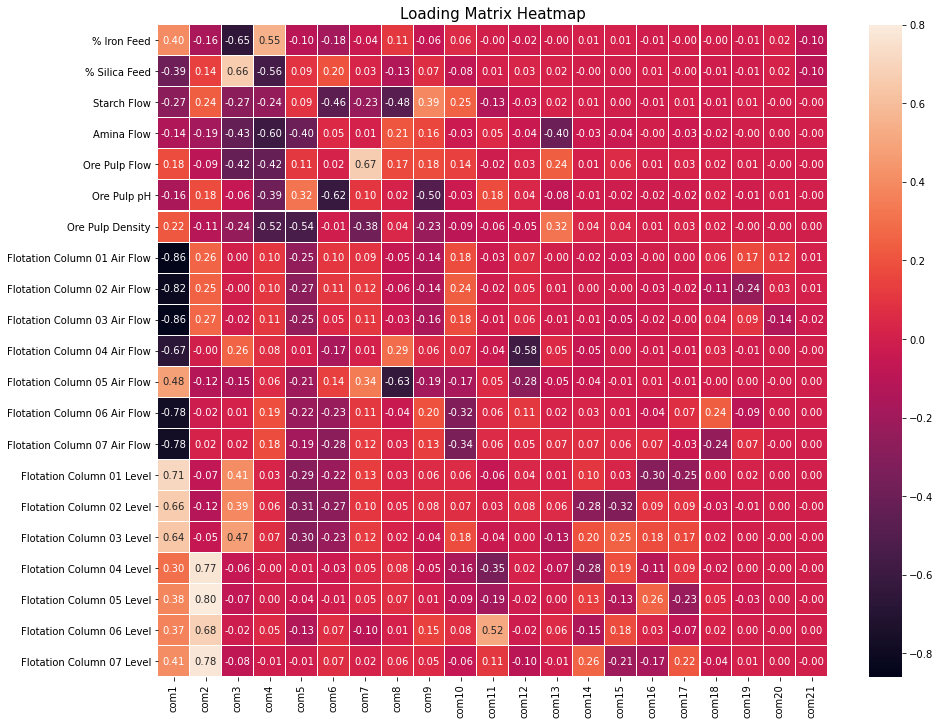

In [43]:
plt.figure(figsize=(15, 12))
sns.heatmap(loading_matrix.round(2),annot = True, fmt = '.2f', linewidths = 0.05, linecolor= 'white')
plt.title('Loading Matrix Heatmap', fontsize = 15)

To ensure the prediction accuracy of the mining data, 12 principle components are selected for data processing, which could explain 91.54% data of the whole dataset.

Performing PCA (n_components is 12)

In [44]:
pca_mining = PCA(n_components = 12)
x_train = pca_mining.fit_transform(x_train)
x_test = pca_mining.transform(x_test)

In [45]:
x_train_pca = pd.DataFrame(data = x_train
             , columns = ['com1','com2','com3','com4','com5','com6','com7','com8','com9','com10','com11',\
                                                 'com12'])

Merge data columns of '% Silica Concentrate' and '% Iron Concentrate' with data after PCA

In [46]:
x_train_pca.head()

,com1,com2,com3,com4,com5,com6,com7,com8,com9,com10,com11,com12
0,0.276032,3.768115,0.598260,0.546302,-0.345886,-1.712570,1.548082,0.448908,-0.387875,-0.033924,-0.986614,-0.677809
1,0.613497,3.134794,-0.885165,2.515830,-1.590374,0.764061,-1.801785,0.288211,0.475633,0.167227,-0.216990,0.275362
2,-2.832917,-0.827733,0.612676,-2.840836,0.912110,-0.691316,-0.246788,-2.681937,-0.583023,0.508801,-0.846643,-0.066437
3,-0.654722,0.180564,-0.938250,-0.363488,-0.745987,-0.329938,1.061655,0.708575,0.755459,1.722332,2.299971,0.160769
4,-1.090533,-0.649731,0.638090,-0.052681,-0.904407,1.367260,0.584925,1.017406,-0.741736,-0.300648,-0.039742,0.402132


#### Correlation(Pearson) matrix heatmap among each component.

Text(0.5, 1.0, 'Correlation Map Between New Variables')

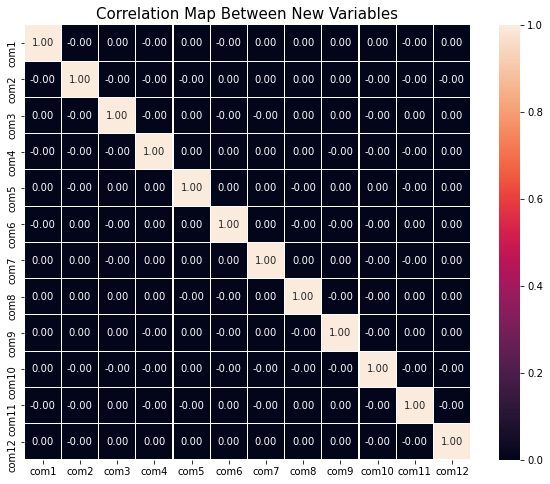

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(x_train_pca.corr(method = 'pearson'), annot = True, fmt = '.2f', linewidths = 0.05, linecolor= 'white')
plt.title('Correlation Map Between New Variables', fontsize = 15)

In [48]:
loadings = pca_mining.components_.T * np.sqrt(pca_mining.explained_variance_)

In [49]:
loading_matrix = pd.DataFrame(loadings, columns=['com1','com2','com3','com4','com5','com6','com7','com8','com9','com10','com11',\
                                                 'com12'],\
                              index=x.columns)


Text(0.5, 1.0, 'Loading Matrix Heatmap')

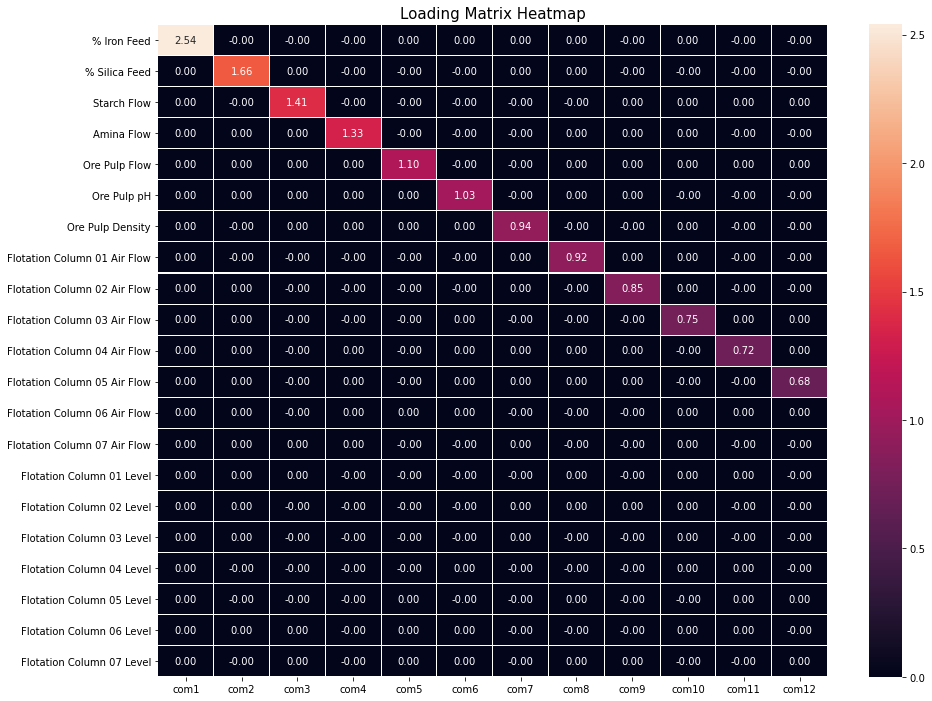

In [50]:
plt.figure(figsize=(15, 12))
sns.heatmap(loading_matrix.round(2),annot = True, fmt = '.2f', linewidths = 0.05, linecolor= 'white')
plt.title('Loading Matrix Heatmap', fontsize = 15)

<a id='trainandtest'></a>
## 3. Data Training and Testing
<a href=#top>(back to top)</a>

<a id='linear'></a>
### Linear Regression Model

The R2 value is: 0.09618
The Adjusted R2 value is: 0.09614


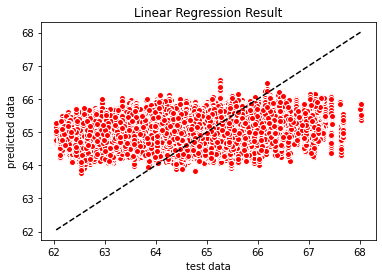

In [123]:
linear = LinearRegression() # Linear Regression
linear.fit(x_train,y_train)
y_pre_linear = linear.predict(x_test)
linear_score =r2_score(y_test,y_pre_linear)
adj_r2 = (1 - (1 - linear_score) * ((train.shape[0] - 1) / 
          (train.shape[0] - train.shape[1] - 1)))

#clf_score = r2_score(y_true,y_pre_clf)


plt.scatter(y_test, y_pre_linear, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Linear Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

print(f'The R2 value is: {linear_score.round(5)}')
print(f'The Adjusted R2 value is: {adj_r2.round(5)}')

In [124]:
linear_EV = explained_variance_score(y_test, y_pre_linear)
linear_MAE = mean_absolute_error(y_test, y_pre_linear)
linear_medAE = median_absolute_error(y_test,y_pre_linear)
linear_MSE = mean_squared_error(y_test, y_pre_linear)
linear_RMSE = np.sqrt(mean_squared_error(y_test, y_pre_linear))
#linear_MAPE = 100 * ((abs(y_pre_linear - y_test)/y_test))
#Accuracy = 100 - np.mean(linear_MAPE)

print('Linear Expained Value (EV)e：',linear_EV.round(5))
print('Linear Mean Absolute Error (MAE)：',linear_MAE.round(5))
print('Linear Median Absolute Error (medAE)：',linear_medAE.round(5))
print('Linear Mean Squared Error (MSE)：',linear_MSE.round(5))
print('Linear Rooted Mean Squared Error (RMSE)：',linear_RMSE.round(5))
#print('Accuracy:', round(Accuracy, 2), '%.')


Linear Expained Value (EV)e： 0.09618
Linear Mean Absolute Error (MAE)： 0.84333
Linear Median Absolute Error (medAE)： 0.71464
Linear Mean Squared Error (MSE)： 1.11994
Linear Rooted Mean Squared Error (RMSE)： 1.05827


<a id='ridege'></a>
### Ridege Regression Model

The R2 value is: 0.09618
The Adjusted R2 value is: 0.09614


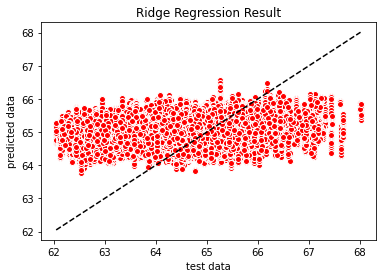

In [125]:
ridge = Ridge() # Ridge Regression
ridge.fit(x_train,y_train)
y_pre_ridge = ridge.predict(x_test)
ridge_score =r2_score(y_test,y_pre_ridge)
adj_r2 = (1 - (1 - ridge_score) * ((train.shape[0] - 1) / 
          (train.shape[0] - train.shape[1] - 1)))

plt.scatter(y_test, y_pre_ridge, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Ridge Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

print(f'The R2 value is: {ridge_score.round(5)}')
print(f'The Adjusted R2 value is: {adj_r2.round(5)}')

In [126]:
ridge_EV = explained_variance_score(y_test, y_pre_ridge)
ridge_MAE = mean_absolute_error(y_test, y_pre_ridge)
ridge_medAE = median_absolute_error(y_test,y_pre_ridge)
ridge_MSE = mean_squared_error(y_test, y_pre_ridge)
ridge_RMSE = np.sqrt(mean_squared_error(y_test, y_pre_ridge))

print('Ridge Expained Value (EV)：',ridge_EV.round(5))
print('Ridge Mean Absolute Error (MAE)：',ridge_MAE.round(5))
print('Ridge Median Absolute Error (medAE)：',ridge_medAE.round(5))
print('Ridge Mean Squared Error (MSE)：',ridge_MSE.round(5))
print('Ridge Rooted Mean Squared Error (RMSE)：',ridge_RMSE.round(5))

Ridge Expained Value (EV)： 0.09618
Ridge Mean Absolute Error (MAE)： 0.84333
Ridge Median Absolute Error (medAE)： 0.71464
Ridge Mean Squared Error (MSE)： 1.11994
Ridge Rooted Mean Squared Error (RMSE)： 1.05827


<a id='huber'></a>
### Huber Regression Model

The R2 value is: 0.08766
The Adjusted R2 value is: 0.08762


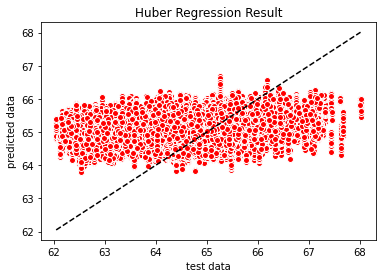

In [127]:
huber = HuberRegressor() # Huber Regression
huber.fit(x_train,y_train)
y_pre_huber = huber.predict(x_test)
huber_score =r2_score(y_test,y_pre_huber)
adj_r2 = (1 - (1 - huber_score) * ((train.shape[0] - 1) / 
          (train.shape[0] - train.shape[1] - 1)))

plt.scatter(y_test, y_pre_huber, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Huber Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

print(f'The R2 value is: {huber_score.round(5)}')
print(f'The Adjusted R2 value is: {adj_r2.round(5)}')

In [128]:
huber_EV = explained_variance_score(y_test, y_pre_huber)
huber_MAE = mean_absolute_error(y_test, y_pre_huber)
huber_medAE = median_absolute_error(y_test,y_pre_huber)
huber_MSE = mean_squared_error(y_test, y_pre_huber)
huber_RMSE = np.sqrt(mean_squared_error(y_test, y_pre_huber))

print('Huber Expained Value (EV)：',huber_EV.round(5))
print('Huber Mean Absolute Error (MAE)：',huber_MAE.round(5))
print('Huber Median Absolute Error (medAE)：',huber_medAE.round(5))
print('Huber Mean Squared Error (MSE)：',huber_MSE.round(5))
print('Huber Rooted Mean Squared Error (RMSE)：',huber_RMSE.round(5))

Huber Expained Value (EV)： 0.0954
Huber Mean Absolute Error (MAE)： 0.83565
Huber Median Absolute Error (medAE)： 0.69229
Huber Mean Squared Error (MSE)： 1.1305
Huber Rooted Mean Squared Error (RMSE)： 1.06325


<a id='knn'></a>
### KNN Regression Model

Default configuration:
K = 3

In [130]:
mining_data_rem_sam = mining_data_rem.sample(frac = 0.1, replace = True )

In [131]:
y = mining_data_rem_sam['% Iron Concentrate']
x = mining_data_rem_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [132]:
target = y
train = x

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [133]:
## Performing standardization before applying PCA
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [134]:
np.mean(x_train), np.std(x_train)

(9.709453552065892e-16, 0.9999999999999999)

In [135]:
pca_mining = PCA(n_components = 12)
x_train = pca_mining.fit_transform(x_train)
x_test = pca_mining.transform(x_test)

The cross validation R2 score is: 0.59852


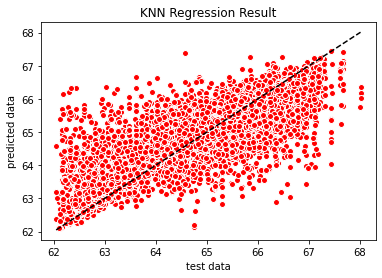

In [136]:
knn = KNeighborsRegressor(weights = 'uniform') # Knn Regression
knn.fit(x_train,y_train)
y_pre_knn = knn.predict(x_test)
#knn_score1 = r2_score(y_test,y_pre_knn)
#adj_r2 = (1 - (1 - knn_score) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
#knn_cross_val_score = cross_val_score(knn, x_train, y_train, cv=10 ,scoring = "r2")
#print(knn_cross_val_score)
knn_score1 = cross_val_score(knn,x_train,y_train,cv=10,scoring='r2').mean()

plt.scatter(y_test, y_pre_knn, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('KNN Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The R2 value is: {knn_score.round(5)}')
#print(f'The Adjusted R2 value is: {adj_r2.round(5)}')
print(f'The cross validation R2 score is: {knn_score1.round(5)}')

In [138]:
knn_EV1 = explained_variance_score(y_test, y_pre_knn)
knn_MAE1 = mean_absolute_error(y_test, y_pre_knn)
knn_medAE1 = median_absolute_error(y_test,y_pre_knn)
knn_MSE1 = mean_squared_error(y_test, y_pre_knn)
knn_RMSE1 = np.sqrt(mean_squared_error(y_test, y_pre_knn))

print('KNN Expained Value (EV)：',knn_EV1.round(5))
print('KNN Mean Absolute Error (MAE)：',knn_MAE1.round(5))
print('KNN Median Absolute Error (medAE)：',knn_medAE1.round(5))
print('KNN Mean Squared Error (MSE)：',knn_MSE1.round(5))

KNN Expained Value (EV)： 0.61289
KNN Mean Absolute Error (MAE)： 0.45572
KNN Median Absolute Error (medAE)： 0.284
KNN Mean Squared Error (MSE)： 0.47845


#### Parameter adjustment

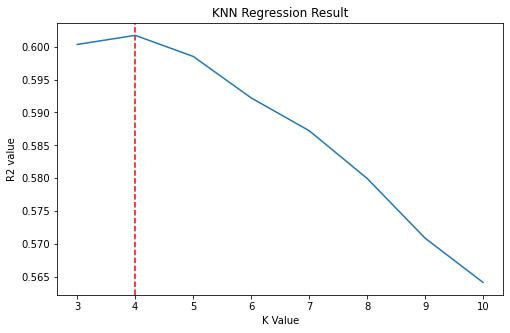

Running time: 1 min


In [139]:
start = time()

score_list =[]
for i in np.arange(3,11):
    knn = KNeighborsRegressor(i,weights='uniform')
    score = cross_val_score(knn,x_train,y_train,cv=10,scoring='r2').mean()
    #score = r2_score(y_test,y_pre_knn)
    score_list.append(score)
    scoreall = np.array(score_list)

plt.figure(figsize=[8,5])
plt.axvline(x = 4.0, c = 'r', ls = '--')
plt.plot(range(3,11),score_list)
plt.title('KNN Regression Result')
plt.xlabel('K Value')
plt.ylabel('R2 value')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Using optimized K value, K = 4.

The cross validation R2 score is: 0.62009


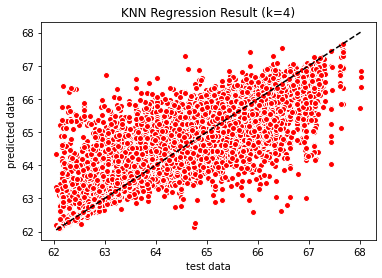

In [140]:
knn = KNeighborsRegressor(4, weights = 'uniform') # Knn Regression
knn.fit(x_train,y_train)
y_pre_knn = knn.predict(x_test)
knn_score2 = r2_score(y_test,y_pre_knn)
#adj_r2 = (1 - (1 - knn_score) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
#knn_cross_val_score = cross_val_score(knn, x_train, y_train, cv=10 ,scoring = "r2")
#print(knn_cross_val_score)
#knn_score2 = cross_val_score(knn,x_train,y_train,cv=10,scoring='r2').mean()

plt.scatter(y_test, y_pre_knn, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('KNN Regression Result (k=4)')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The R2 value is: {knn_score.round(5)}')
#print(f'The Adjusted R2 value is: {adj_r2.round(5)}')
print(f'The cross validation R2 score is: {knn_score2.round(5)}')

In [141]:
knn_EV2 = explained_variance_score(y_test, y_pre_knn)
knn_MAE2 = mean_absolute_error(y_test, y_pre_knn)
knn_medAE2 = median_absolute_error(y_test,y_pre_knn)
knn_MSE2 = mean_squared_error(y_test, y_pre_knn)

print('KNN Expained Value (EV)：',knn_EV2.round(5))
print('KNN Mean Absolute Error (MAE)：',knn_MAE2.round(5))
print('KNN Median Absolute Error (medAE)：',knn_medAE2.round(5))
print('KNN Mean Squared Error (MSE)：',knn_MSE2.round(5))

KNN Expained Value (EV)： 0.6202
KNN Mean Absolute Error (MAE)： 0.43831
KNN Median Absolute Error (medAE)： 0.2625
KNN Mean Squared Error (MSE)： 0.46938


<a id='decision'></a>
### Decision Tree Regression Model

In [145]:
#Data samping
mining_data_sam = mining_data_rem.sample(frac = .1, replace = True)

In [146]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [147]:
#Split data for training and testing, 70% training data and 30% testing data.
target = y
train = x
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

The cross validation R2 score is: 0.60221


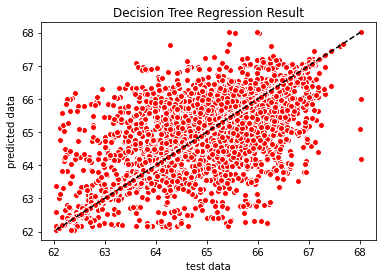

In [148]:
decision = DecisionTreeRegressor() # Decision Tree Regression
decision.fit(x_train,y_train)
y_pre_decision = decision.predict(x_test)
#decision_score =r2_score(y_test,y_pre_decision)
#adj_r2 = (1 - (1 - decision_score) * ((train.shape[0] - 1) / (train.shape[0] - train.shape[1] - 1)))
DT_score = cross_val_score(decision, x_train, y_train, cv=10 ,scoring = "r2").mean()
#neg_mean_squared_error
plt.scatter(y_test, y_pre_decision, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Decision Tree Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The R2 value is: {decision_score.round(5)}')
#print(f'The Adjusted R2 value is: {decision_score.round(5)}')
print(f'The cross validation R2 score is: {DT_score.round(5)}')

In [149]:
DT_EV = explained_variance_score(y_test, y_pre_decision)
DT_MAE = mean_absolute_error(y_test, y_pre_decision)
DT_medAE = median_absolute_error(y_test,y_pre_decision)
DT_MSE = mean_squared_error(y_test, y_pre_decision)

print('DT Expained Value (EV)：',DT_EV.round(5))
print('DT Mean Absolute Error (MAE)：',DT_MAE.round(5))
print('DT Median Absolute Error (medAE)：',DT_medAE.round(5))
print('DT Mean Squared Error (MSE)：',DT_MSE.round(5))

DT Expained Value (EV)： 0.66632
DT Mean Absolute Error (MAE)： 0.28478
DT Median Absolute Error (medAE)： 0.0
DT Mean Squared Error (MSE)： 0.40996


<a id='rfr'></a>
### Random Forest Regression Model

#### Random Forest Regression (using original data)

Default configuration:

n_estimators = 100\
max_depth = None\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 'auto'

Use 10% of the original dataset with default configuration to set up random forest regression model.

In [95]:
#Data samping
mining_data_sam = mining_data_rem.sample(frac = .1, replace = True)

In [96]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [97]:
#Split data for training and testing, 70% training data and 30% testing data.
target = y
train = x
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [84]:
# Feature Scaling
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [85]:
#Calculate oob score
start = time()

rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)
oob_score1 = rfr.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score1.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.836
Running time: 1 min


The train R2 score is: 0.81503
The test R2 score is: 0.82504
The predict R2 score is: 0.82504
Running time: 12 min


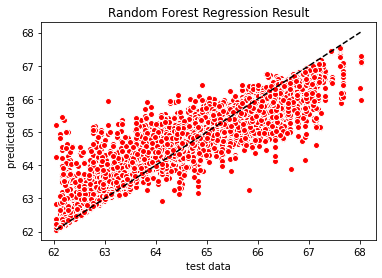

In [54]:
start = time()
'''
rfr = RandomForestRegressor(random_state = 5022) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)'''
#rfr_score = rfr.oob_score_
#rfr_r2_score_train1 = rfr.score(x_train, y_train)
rfr_r2_score_train1 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='r2').mean()
rfr_r2_score_test1 = rfr.score(x_test,y_test)
rfr_r2_score1 = r2_score(y_test,rfr_y_predict)

plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
print(f'The train R2 score is: {rfr_r2_score_train1.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test1.round(5)}')
print(f'The predict R2 score is: {rfr_r2_score1.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [55]:
rfr_EV1 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE1 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE1 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE1 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE1 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV1.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE1.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE1.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE1.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE1.round(5))

RF Expained Value (EV)： 0.82509
RF Mean Absolute Error (MAE)： 0.30268
RF Median Absolute Error (medAE)： 0.18379
RF Mean Squared Error (MSE)： 0.21626
RF Rooted Mean Squared Error (RMSE)： 0.46504


In [98]:
rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_train,y_train)

RandomForestRegressor(oob_score=True, random_state=5022)

In [100]:
score1 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_mean_absolute_error').mean()
score2 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_root_mean_squared_error').mean()
score3 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_mean_squared_error').mean()

In [101]:
print(score1, score2,score3)

-0.3069155897420329 -0.46234613596818586 -0.21380909116912497


#### Random Forest Regression (using data after PCA)

Default configuration:

n_estimators = 100\
max_depth = None\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 'auto'

#### Random Forest Regression (using data after PCA)

Default configuration:

n_estimators = 100\
max_depth = None\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 'auto'

In [60]:
rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)
oob_score2 = rfr.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score2.round(3)}')
#print(r2_score)

The oob_score is: 0.538


The train R2 score is: 0.93617
The test R2 score is: 0.56169
The R2 score is: 0.52261
Running time: 3 min


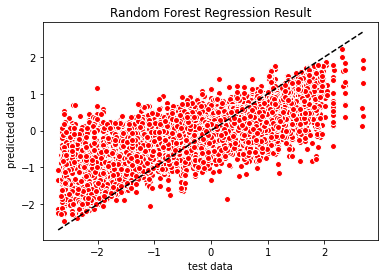

In [61]:
start = time()
'''
rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)'''
#rfr_score = rfr.oob_score_
#cross_val_score_rfr = cross_val_score(rfr, x_train, y_train, cv=10 ,scoring = "r2").mean()
rfr_r2_score2 = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2').mean()
rfr_r2_score_train2 = rfr.score(x_train, y_train)
rfr_r2_score_test2 = rfr.score(x_test,y_test)

plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)

plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
#print(f'The cross validation R2 score is: {cross_val_score_rfr.round(5)}')
print(f'The train R2 score is: {rfr_r2_score_train2.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test2.round(5)}')
print(f'The R2 score is: {rfr_r2_score2.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [62]:
rfr_EV2 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE2 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE2 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE2 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE2 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV2.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE2.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE2.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE2.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE2.round(5))

RF Expained Value (EV)： 0.56169
RF Mean Absolute Error (MAE)： 0.47878
RF Median Absolute Error (medAE)： 0.34789
RF Mean Squared Error (MSE)： 0.43996
RF Rooted Mean Squared Error (RMSE)： 0.6633


In [55]:
rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_train,y_train)

RandomForestRegressor(oob_score=True, random_state=5022)

In [56]:
score4 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_mean_absolute_error').mean()
score5 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_root_mean_squared_error').mean()
score6 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='neg_mean_squared_error').mean()

In [57]:
print(score4, score5,score6)

-0.35742633437296084 -0.5458920098380362 -0.2980136849522519


#### Parameters adjustment (using original data)

n_estimators\
max_depth\
min_samples_leaf\
min_samples_split\
max_features

In [175]:
mining_data_nor_sam = mining_data_nor.sample(frac = .1, replace = True)

In [176]:
y = mining_data_nor_sam['% Iron Concentrate']
x = mining_data_nor_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [177]:
target = y
train = x
#train = mining_data_sam_rem.drop(['% Iron Concentrate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)
#rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
#rfr.fit(x_train,y_train)
#rfr_y_predict = rfr.predict(x_test)

In [178]:
# Feature Scaling
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

Optimized parameters and respective score: [610.           0.83728163]


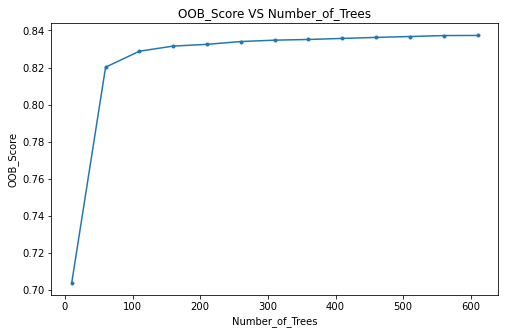

Running time: 54 min


In [179]:
#n_estimators adjustment
start = time()

import warnings
warnings.filterwarnings('ignore')

ScoreAll = []
for i in range(10,611,50):
    rfr = RandomForestRegressor(n_estimators = i, random_state = 5022, oob_score = True) # Random Forest Regression
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1],marker = '.')
plt.title('OOB_Score VS Number_of_Trees')
plt.xlabel('Number_of_Trees')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [610.           0.83728163]


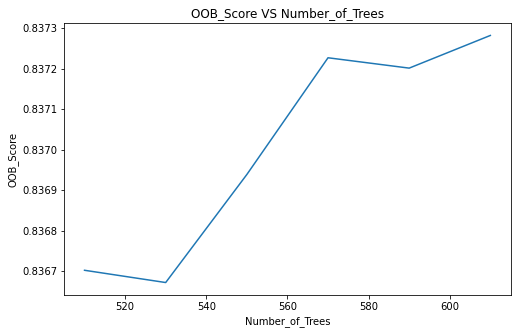

Running time: 45 min


In [180]:
#Narrow down the range of n_estimators

start = time()

import warnings
warnings.filterwarnings('ignore')

ScoreAll = []
for i in range(510,611,20):
    rfr = RandomForestRegressor(n_estimators = i, random_state = 5022, oob_score = True) # Random Forest Regression
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Number_of_Trees')
plt.xlabel('Number_of_Trees')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [575.           0.83726878]


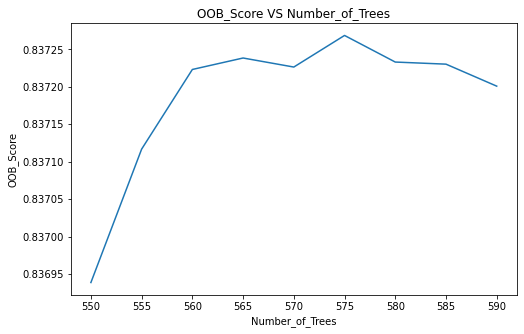

Running time: 69 min


In [181]:
#Narrow down the range of n_estimators

start = time()

import warnings
warnings.filterwarnings('ignore')

ScoreAll = []
for i in range(550,591,5):
    rfr = RandomForestRegressor(n_estimators = i, random_state = 5022, oob_score = True) # Random Forest Regression
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Number_of_Trees')
plt.xlabel('Number_of_Trees')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [576.           0.83729403]


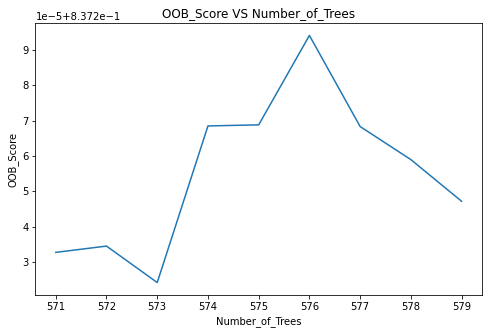

Running time: 69 min


In [182]:
#Narrow down the range of n_estimators

start = time()

import warnings
warnings.filterwarnings('ignore')

ScoreAll = []
for i in range(571,580):
    rfr = RandomForestRegressor(n_estimators = i, random_state = 5022, oob_score = True) # Random Forest Regression
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Number_of_Trees')
plt.xlabel('Number_of_Trees')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [40.          0.83734759]


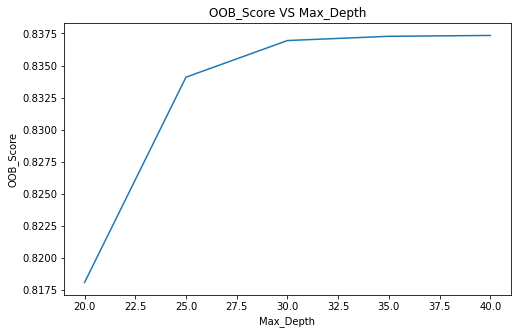

Running time: 38 min


In [184]:
###Max_depth parameters

start = time()

ScoreAll = []
for i in range(20,41,5):
    rfr = RandomForestRegressor(n_estimators = 576, random_state = 5022,\
                                max_depth = i, oob_score = True) # Random Forest Regression
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Max_Depth')
plt.xlabel('Max_Depth')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [40.          0.83734759]


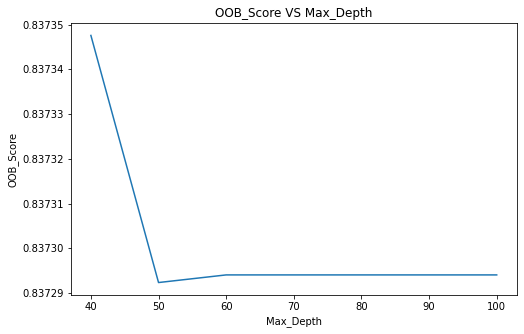

Running time: 54 min


In [186]:
###Max_depth parameters

start = time()

ScoreAll = []
for i in range(40,101,10):
    rfr = RandomForestRegressor(n_estimators = 576, random_state = 5022,\
                                max_depth = i, oob_score = True) # Random Forest Regression
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Max_Depth')
plt.xlabel('Max_Depth')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [41.          0.83741306]


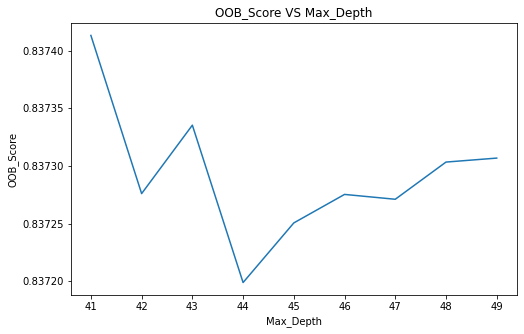

Running time: 73 min


In [187]:
###Max_depth parameters

start = time()

ScoreAll = []
for i in range(41,50):
    rfr = RandomForestRegressor(n_estimators = 576, random_state = 5022,\
                                max_depth = i, oob_score = True) # Random Forest Regression
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Max_Depth')
plt.xlabel('Max_Depth')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [2.         0.83741306]


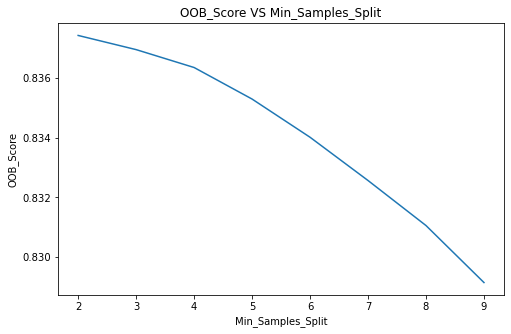

Running time: 63 min


In [190]:
#Min_samples_split
start = time()

ScoreAll = []
for i in range(2,10):
    rfr = RandomForestRegressor(n_estimators = 576, random_state = 5022,\
                                max_depth = 41, min_samples_split = i, oob_score = True) # Random Forest Regression
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Min_Samples_Split')
plt.xlabel('Min_Samples_Split')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [1.         0.83741306]


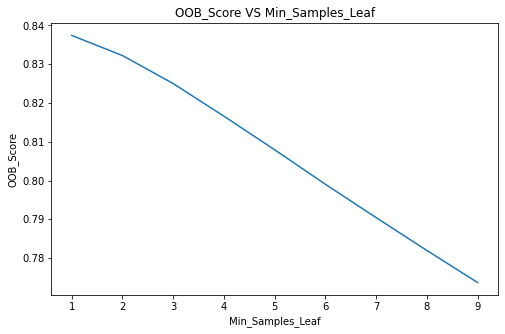

Running time: 66 min


In [192]:
#Min_samples_leaf
start = time()

ScoreAll = []
for i in range(1,10):
    rfr = RandomForestRegressor(n_estimators = 576,random_state = 5022,max_depth =41,\
                                 min_samples_leaf = i,min_samples_split = 2, oob_score = True ) 
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Min_Samples_Leaf')
plt.xlabel('Min_Samples_Leaf')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [14.          0.83583751]


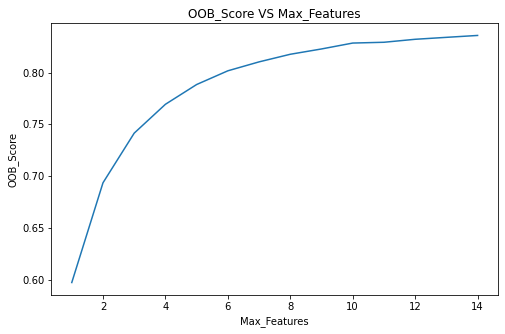

Running time: 44 min


In [193]:
#Max_features
start = time()

ScoreAll = []
for i in range(1,15):
    rfr = RandomForestRegressor(random_state = 5022,n_estimators = 576,max_depth = 41,\
                                 min_samples_leaf =1 ,min_samples_split = 2, max_features = i, oob_score = True )
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Max_Features')
plt.xlabel('Max_Features')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Optimized parameters and respective score: [18.         0.8387571]


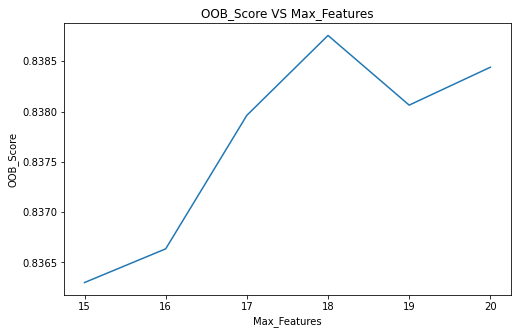

Running time: 41 min


In [194]:
#Max_features
start = time()

ScoreAll = []
for i in range(15,21):
    rfr = RandomForestRegressor(random_state = 5022,n_estimators = 576,max_depth = 41,\
                                 min_samples_leaf =1 ,min_samples_split = 2, max_features = i, oob_score = True )
    rfr.fit(x_train,y_train)
    rfr_y_predict = rfr.predict(x_test)
    #score = r2_score(y_test,rfr_y_predict)
    score = rfr.oob_score_
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("Optimized parameters and respective score:",ScoreAll[max_score])  
plt.figure(figsize=[8,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.title('OOB_Score VS Max_Features')
plt.xlabel('Max_Features')
plt.ylabel('OOB_Score')
plt.show()

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

<a id='neural'></a>
### Neural Network Regression Model

Use 10% of the original dataset with default configuration to set up neural network regression model.

In [214]:
mining_data_sam = mining_data_rem.sample(frac = .1, replace = True)

In [215]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [216]:
target = y
train = x
#train = mining_data_sam_rem.drop(['% Iron Concentrate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [217]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train = sc.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = sc.transform(np.array(y_test).reshape(-1, 1))

MLP R2 Score:  0.6788


[]

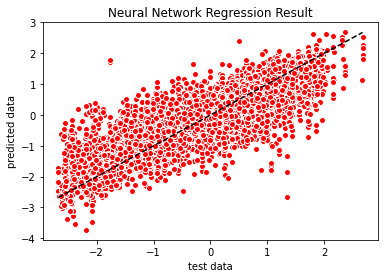

In [230]:
'''
# Netural network data formatting
ss_x = preprocessing.StandardScaler()
train_x_disorder = ss_x.fit_transform(x_train)
test_x_disorder = ss_x.transform(x_test)

ss_y = preprocessing.StandardScaler()
train_y_disorder = ss_y.fit_transform(np.array(y_train).reshape(-1, 1))
test_y_disorder = ss_y.transform(np.array(y_test).reshape(-1, 1))
'''
#clf = MLPRegressor(solver='sgd', alpha=1e-5, hidden_layer_sizes=(2, 1), random_state=5022)
clf = MLPRegressor(hidden_layer_sizes=(800, 800), tol=1e-2, max_iter=10000, learning_rate_init=0.001,random_state=5022)

'''clf = MLPRegressor(
    hidden_layer_sizes=(20,20,20),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=10000, shuffle=True,
    random_state=5022, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)'''

# Data Training
clf.fit(x_train,y_train.ravel())
y_pre_clf = clf.predict(x_test)

clf_score1 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score1)

#plt.plot(y_test,label = 'true')
#plt.plot(y_pre_clf,label ='Netural Network')
#plt.legend()
#plt.show()

plt.scatter(y_test, y_pre_clf, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Neural Network Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

In [231]:
clf_EV1 = explained_variance_score(y_test,y_pre_clf)
clf_MAE1 = mean_absolute_error(y_test,y_pre_clf)
clf_medAE1 = median_absolute_error(y_test,y_pre_clf)
clf_MSE1 = mean_squared_error(y_test,y_pre_clf)


print('MLP Expained Value (EV)：',clf_EV1.round(5))
print('MLP Mean Absolute Error (MAE)：',clf_MAE1.round(5))
print('MLP Median Absolute Error (medAE)：',clf_medAE1.round(5))
print('MLP Mean Squared Error (MSE)：',clf_MSE1.round(5))

MLP Expained Value (EV)： 0.67929
MLP Mean Absolute Error (MAE)： 0.41042
MLP Median Absolute Error (medAE)： 0.30441
MLP Mean Squared Error (MSE)： 0.31409


Use 50% of the original dataset with default configuration to set up Neural Network regression model.

In [214]:
mining_data_sam = mining_data_rem.sample(frac = .5, replace = True)

In [215]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [216]:
target = y
train = x
#train = mining_data_sam_rem.drop(['% Iron Concentrate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [217]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train = sc.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = sc.transform(np.array(y_test).reshape(-1, 1))

MLP R2 Score:  0.67806


[]

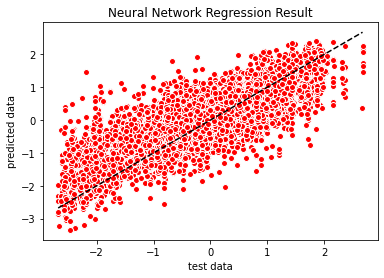

In [232]:
clf = MLPRegressor(hidden_layer_sizes=(800, 800), tol=1e-2, max_iter=10000, learning_rate_init=0.001,random_state=5022)

'''clf = MLPRegressor(
    hidden_layer_sizes=(20,20,20),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=10000, shuffle=True,
    random_state=5022, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)'''

# Data Training
clf.fit(train_x_disorder,train_y_disorder.ravel())
y_pre_clf = clf.predict(x_test)

clf_score2 = r2_score(y_test, y_pre_clf).round(5)
print('MLP R2 Score: ',clf_score2)

#plt.plot(y_test,label = 'true')
#plt.plot(y_pre_clf,label ='Netural Network')
#plt.legend()
#plt.show()

plt.scatter(y_test, y_pre_clf, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Neural Network Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

In [233]:
clf_EV2 = explained_variance_score(y_test,y_pre_clf)
clf_MAE2 = mean_absolute_error(y_test,y_pre_clf)
clf_medAE2 = median_absolute_error(y_test,y_pre_clf)
clf_MSE2 = mean_squared_error(y_test,y_pre_clf)


print('MLP Expained Value (EV)：',clf_EV2.round(5))
print('MLP Mean Absolute Error (MAE)：',clf_MAE2.round(5))
print('MLP Median Absolute Error (medAE)：',clf_medAE2.round(5))
print('MLP Mean Squared Error (MSE)：',clf_MSE2.round(5))

MLP Expained Value (EV)： 0.68452
MLP Mean Absolute Error (MAE)： 0.41146
MLP Median Absolute Error (medAE)： 0.30733
MLP Mean Squared Error (MSE)： 0.31481


<a id='predict'></a>
## 4. Data Prediction and Mining Process Improvement
<a href=#top>(back to top)</a>

<a id='pre'></a>
### Data Prediction with Random Forest Model

#### Random Forest Regression (using original data 10%)

Optimized configuration:

n_estimators = 576\
max_depth = 41\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 18

In [58]:
#Data samping
mining_data_sam = mining_data_rem.sample(frac = .1, replace = True)

In [59]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [60]:
target = y
train = x
#train = mining_data_sam_rem.drop(['% Iron Concentrate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [66]:
# Feature Scaling

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [67]:
start = time()
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)
oob_score3 = rfr.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score3.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.837
Running time: 6 min


The train R2 score is: 0.82533
The test R2 score is: 0.83668
The R2 score is: 0.83668
Running time: 61 min


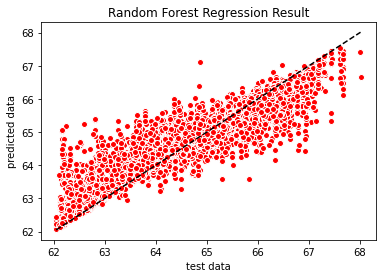

In [68]:
start = time()
'''
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)'''
#rfr_score = rfr.oob_score_
#cross_val_score_rfr = cross_val_score(rfr, x_train, y_train, cv=10 ,scoring = "r2").mean()
rfr_r2_score_train3 = cross_val_score(rfr,x_train,y_train,cv=10,scoring='r2').mean()
rfr_r2_score_test3 = rfr.score(x_test,y_test)

rfr_r2_score3 = r2_score(y_test,rfr_y_predict)
plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)

plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
#print(f'The cross validation R2 score is: {cross_val_score_rfr.round(5)}')
print(f'The train R2 score is: {rfr_r2_score_train3.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test3.round(5)}')
print(f'The R2 score is: {rfr_r2_score3.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [69]:
rfr_EV3 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE3 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE3 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE3 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE3 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV3.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE3.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE3.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE3.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE3.round(5))

RF Expained Value (EV)： 0.83671
RF Mean Absolute Error (MAE)： 0.29484
RF Median Absolute Error (medAE)： 0.18614
RF Mean Squared Error (MSE)： 0.1983
RF Rooted Mean Squared Error (RMSE)： 0.44531


In [61]:
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = False ) # Random Forest Regression
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=41, max_features=18, n_estimators=576,
                      random_state=5022)

In [63]:
score7 = cross_val_score(rfr,x_train,y_train,cv=3,scoring='neg_mean_absolute_error').mean()
score8 = cross_val_score(rfr,x_train,y_train,cv=3,scoring='neg_root_mean_squared_error').mean()
score9 = cross_val_score(rfr,x_train,y_train,cv=3,scoring='neg_mean_squared_error').mean()

In [64]:
print(score7, score8,score9)

-0.36029997266351704 -0.5175185407953332 -0.267873877110583


#### Random Forest Regression (using original data 50%)

Optimized configuration:

n_estimators = 576\
max_depth = 41\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 18

In [65]:
#Data samping
mining_data_sam = mining_data_rem.sample(frac = .5, replace = True)

In [66]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [67]:
target = y
train = x
#train = mining_data_sam_rem.drop(['% Iron Concentrate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [73]:
# Feature Scaling

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [74]:
start = time()
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)
oob_score4 = rfr.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score4.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.966
Running time: 42 min


The train R2 score is: 0.95686
The test R2 score is: 0.96669
The R2 score is: 0.96669
Running time: 164 min


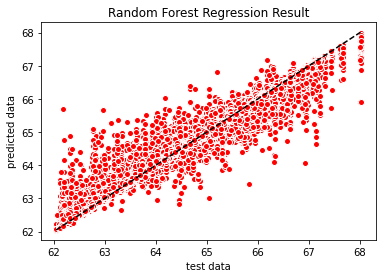

In [75]:
start = time()
'''
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)'''
#rfr_score = rfr.oob_score_
#cross_val_score_rfr = cross_val_score(rfr, x_train, y_train, cv=10 ,scoring = "r2").mean()
rfr_r2_score4 = r2_score(y_test,rfr_y_predict)
rfr_r2_score_train4 = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2').mean()
rfr_r2_score_test4 = rfr.score(x_test,y_test)

plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)

plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
#print(f'The cross validation R2 score is: {cross_val_score_rfr.round(5)}')
print(f'The train R2 score is: {rfr_r2_score_train4.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test4.round(5)}')
print(f'The R2 score is: {rfr_r2_score4.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [76]:
rfr_EV4 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE4 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE4 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE4 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE4 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV4.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE4.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE4.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE4.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE4.round(5))

RF Expained Value (EV)： 0.96669
RF Mean Absolute Error (MAE)： 0.0958
RF Median Absolute Error (medAE)： 0.03021
RF Mean Squared Error (MSE)： 0.04112
RF Rooted Mean Squared Error (RMSE)： 0.20277


In [68]:
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = False ) # Random Forest Regression
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=41, max_features=18, n_estimators=576,
                      random_state=5022)

In [69]:
score10 = cross_val_score(rfr,x_train,y_train,cv=3,scoring='neg_mean_absolute_error').mean()
score11 = cross_val_score(rfr,x_train,y_train,cv=3,scoring='neg_root_mean_squared_error').mean()
score12 = cross_val_score(rfr,x_train,y_train,cv=3,scoring='neg_mean_squared_error').mean()

In [70]:
print(score10, score11,score12)

-0.13355365788196857 -0.2563499865807219 -0.06571647405721283


#### Random Forest Regression (using original data 100%)

Optimized configuration:

n_estimators = 576\
max_depth = 41\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 18

In [363]:
#Data samping
mining_data_sam = mining_data_rem.sample(frac = 1, replace = True)

In [364]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [365]:
target = y
train = x
#train = mining_data_sam_rem.drop(['% Iron Concentrate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [214]:
# Feature Scaling

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [366]:
start = time()

rfr_final = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr_final.fit(x_train,y_train)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Running time: 100 min


In [215]:
start = time()

rfr_y_predict = rfr_final.predict(x_test)
oob_score5 = rfr_final.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score5.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.986
Running time: 89 min


The train R2 score is: 0.99803
The test R2 score is: 0.98607
The R2 score is: 0.98607
Running time: 1 min


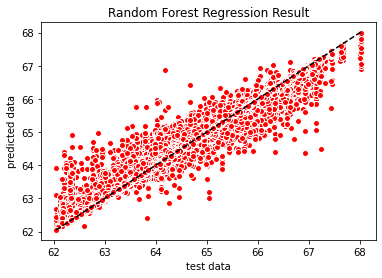

In [216]:
start = time()
'''
rfr_final = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr_final.fit(x_train,y_train)
rfr_y_predict = rfr_final.predict(x_test)'''
#rfr_score = rfr.oob_score_
#cross_val_score_rfr = cross_val_score(rfr, x_train, y_train, cv=10 ,scoring = "r2").mean()
#rfr_r2_score5 = r2_score(y_test,rfr_y_predict)
#rfr_r2_score5 = r2_score(y_test,rfr_y_predict)
#rfr_r2_score_train5 = rfr_final.score(x_train, y_train)
rfr_r2_score5 = r2_score(y_test,rfr_y_predict)
rfr_r2_score_train5 = rfr_final.score(x_train, y_train)
rfr_r2_score_test5 = rfr_final.score(x_test,y_test)

#sns.scatterplot(y_true, y_pre_linear)
plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
#print(f'The cross validation R2 score is: {cross_val_score_rfr.round(5)}')
print(f'The train R2 score is: {rfr_r2_score_train5.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test5.round(5)}')
print(f'The R2 score is: {rfr_r2_score5.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [217]:
rfr_EV5 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE5 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE5 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE5 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE5 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV5.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE5.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE5.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE5.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE5.round(5))

RF Expained Value (EV)： 0.98607
RF Mean Absolute Error (MAE)： 0.05028
RF Median Absolute Error (medAE)： 0.01054
RF Mean Squared Error (MSE)： 0.01707
RF Rooted Mean Squared Error (RMSE)： 0.13067


<a id='imp'></a>
### Mining Process Improvement

Select mining data from the period of '2017-07-01 00:00:00' to '2017-07-01 23:00:00' for model test.

In [405]:
mining_data_test = mining_data[(mining_data['date'] >= '2017-07-01 00:00:00') &
                                               (mining_data['date'] <= '2017-07-01 2:00:00')]
y1_test = mining_data_test['% Iron Concentrate']
x1_test = mining_data_test.iloc[:,1:-2]
#mining_data_test = mining_data_test.reset_index(drop = True)
y1_predict = rfr_final.predict(x1_test)
rfr_r2_score6 = r2_score(y1_test,y1_predict)
print(f'The R2 score is: {rfr_r2_score6.round(5)}')

The R2 score is: 0.96485


In [406]:
x_test

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
198448,56.65,14.83,3813.86,498.293,389.698000,9.95225,1.70172,249.407,249.169,251.721,...,301.401000,300.231,300.500,458.957,460.270000,459.811000,345.632,337.626,259.756,358.659
132178,55.17,14.35,1908.54,514.701,401.580000,9.45962,1.69917,249.798,250.489,251.555,...,302.150735,250.049,250.050,596.216,603.627000,594.357000,420.686,394.111,433.871,400.438
47507,55.66,14.66,2355.59,546.697,399.762000,9.36103,1.74570,250.296,252.695,249.678,...,306.400000,250.113,248.909,596.217,735.869537,607.028000,408.056,417.756,434.229,413.749
71635,55.30,15.26,2451.68,452.544,397.055000,9.84484,1.74289,250.080,246.758,251.404,...,306.400000,249.915,250.207,603.442,607.048000,604.386000,428.528,434.475,473.826,436.454
177358,59.78,9.29,2756.97,596.056,400.504000,9.49901,1.80885,300.204,296.386,297.255,...,297.510000,299.187,298.101,444.723,461.175000,879.402653,362.526,352.736,332.997,324.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735043,54.63,12.90,3314.58,560.263,416.955277,9.68075,1.62125,298.310,297.453,300.618,...,298.108000,296.222,293.508,401.628,535.060000,378.125000,402.496,406.533,373.989,386.476
566178,57.46,10.80,2789.60,620.696,397.263232,10.18970,1.72002,299.885,252.144,298.911,...,298.670355,325.260,349.449,390.578,546.582000,402.420000,393.624,421.139,360.959,367.460
495278,50.58,20.21,2818.50,385.845,409.896000,9.99142,1.63852,300.036,304.271,301.092,...,301.317000,304.088,295.240,499.571,504.491000,500.906000,500.960,511.962,494.930,536.833
669027,56.63,12.23,4212.89,618.719,414.770000,8.91845,1.71162,298.400,297.411,302.794,...,301.762000,307.397,306.286,507.094,527.042000,553.333000,525.528,523.439,500.778,504.886


In [409]:
mining_data_test = mining_data[(mining_data['date'] >= '2017-07-01 00:00:00') &
                                               (mining_data['date'] <= '2017-07-01 1:0:00')]
y1_test = mining_data_test['% Iron Concentrate']
x1_test = mining_data_test.iloc[:,1:-2]
#mining_data_test = mining_data_test.reset_index(drop = True)
y1_predict = rfr_final.predict(x1_test)
rfr_r2_score6 = r2_score(y1_test,y1_predict)
print(f'The R2 score is: {rfr_r2_score6.round(5)}')

The R2 score is: 0.96094


In [308]:
mining_data_test.shape

(4320, 24)

In [309]:
mining_data_test = mining_data_test.reset_index(drop = True)
mining_data_test.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-07-01,49.36,25.87,5324.85,573.223,404.924,10.6953,1.70031,298.973,299.151,...,297.728,492.084,537.246,531.186,522.659,529.830,510.319,514.957,62.81,4.07
1,2017-07-01,49.36,25.87,5377.59,573.120,399.989,10.6932,1.70072,301.451,307.790,...,298.313,475.298,528.784,521.626,517.736,526.770,496.937,533.543,62.81,4.07
2,2017-07-01,49.36,25.87,5330.34,567.581,405.982,10.6911,1.70113,301.360,304.299,...,303.102,482.371,504.894,502.672,503.261,529.081,490.835,540.957,62.81,4.07
3,2017-07-01,49.36,25.87,5285.80,585.896,403.682,10.6889,1.70154,301.605,294.947,...,301.043,487.751,468.601,476.113,512.224,525.793,498.305,542.278,62.81,4.07
4,2017-07-01,49.36,25.87,5277.76,573.310,399.253,10.6868,1.70195,302.400,298.662,...,295.356,497.443,465.772,475.861,503.074,522.203,497.852,529.797,62.81,4.07


In [311]:
mining_data_test.loc[:,'% Iron Concentrate Forecast'] = pd.Series(list(y1_predict))

In [312]:
df_test = mining_data_test.groupby('date').mean()
df_test.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate,% Iron Concentrate Forecast
date,,,,,,,,,,,,,,,,,,,,,
2017-07-01 00:00:00,49.36,25.87,4927.097778,579.474317,399.875111,10.448108,1.717670,299.991372,299.761144,299.898356,...,500.584150,500.958522,501.289239,500.314722,500.947739,500.369583,500.283394,62.81,4.07,63.230584
2017-07-01 01:00:00,57.47,13.41,4475.909644,532.099783,400.271322,10.059482,1.684622,299.936633,299.812361,299.909911,...,500.057950,499.302078,498.717661,496.712172,497.308794,498.554200,492.090622,67.04,1.20,66.869317
2017-07-01 02:00:00,57.47,13.41,4443.694000,541.739939,399.670672,10.272168,1.693550,300.166394,300.103228,299.943100,...,499.866200,499.373172,499.486606,500.537139,499.598978,500.541533,505.156450,66.87,1.14,66.757533
2017-07-01 03:00:00,57.47,13.41,4408.860278,587.473706,399.286000,10.225297,1.724469,299.312039,300.503417,299.937150,...,500.785467,501.524706,500.916500,502.204922,501.502700,499.539461,501.291317,66.87,1.14,66.815659
2017-07-01 04:00:00,57.47,13.41,4664.358417,541.319983,400.907103,10.102304,1.692218,299.995378,299.516828,300.029928,...,503.714411,500.008850,510.358028,500.891450,499.412422,498.449606,499.864667,66.15,1.52,66.125863


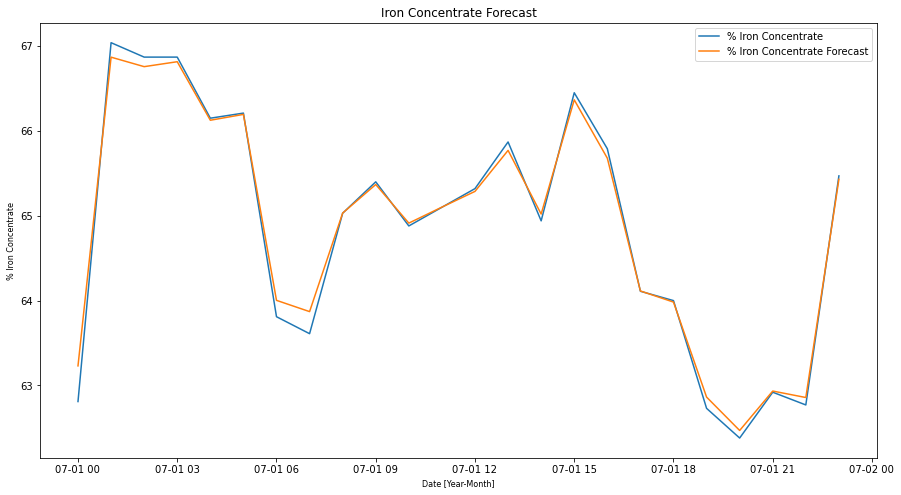

In [313]:
df_test = mining_data_test.groupby('date').mean()
plt.figure(figsize = (15,8))
#plt.plot(df.index, df['% Iron Feed'], label = '% Iron Feed')
#plt.plot(df.index, df['% Silica Feed'], label = '% Silica Feed')
plt.plot(df_test.index, df_test['% Iron Concentrate'], label = '% Iron Concentrate')
plt.plot(df_test.index, df_test['% Iron Concentrate Forecast'], label = '% Iron Concentrate Forecast')
#plt.plot(df.index, df['% Silica Concentrate'], label = '% Silica Concentrate')


plt.title('Iron Concentrate Forecast', size = 12)
plt.ylabel('% Iron Concentrate', size = 8)
plt.xlabel('Date [Year-Month]', size = 8)
plt.legend()
plt.show()

Select mining data from the period of '2017-07-01 00:00:00' to '2017-07-05 23:00:00' for model test.

In [356]:
mining_data_test = mining_data[(mining_data['date'] >= '2017-07-01 00:00:00') &
                                               (mining_data['date'] <= '2017-07-05 23:00:00')]
y1_test = mining_data_test['% Iron Concentrate']
x1_test = mining_data_test.iloc[:,1:-2]

In [357]:
mining_data_test.shape

(21600, 24)

In [358]:
mining_data_test = mining_data_test.reset_index(drop = True)
mining_data_test.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-07-01,49.36,25.87,5324.85,573.223,404.924,10.6953,1.70031,298.973,299.151,...,297.728,492.084,537.246,531.186,522.659,529.830,510.319,514.957,62.81,4.07
1,2017-07-01,49.36,25.87,5377.59,573.120,399.989,10.6932,1.70072,301.451,307.790,...,298.313,475.298,528.784,521.626,517.736,526.770,496.937,533.543,62.81,4.07
2,2017-07-01,49.36,25.87,5330.34,567.581,405.982,10.6911,1.70113,301.360,304.299,...,303.102,482.371,504.894,502.672,503.261,529.081,490.835,540.957,62.81,4.07
3,2017-07-01,49.36,25.87,5285.80,585.896,403.682,10.6889,1.70154,301.605,294.947,...,301.043,487.751,468.601,476.113,512.224,525.793,498.305,542.278,62.81,4.07
4,2017-07-01,49.36,25.87,5277.76,573.310,399.253,10.6868,1.70195,302.400,298.662,...,295.356,497.443,465.772,475.861,503.074,522.203,497.852,529.797,62.81,4.07


In [ ]:
mining_data_test.loc[:,'% Iron Concentrate Forecast'] = pd.Series(list(y1_predict))

In [ ]:
df_test = mining_data_test.groupby('date').mean()
df_test.head()

In [ ]:
df_test = mining_data_test.groupby('date').mean()
plt.figure(figsize = (15,8))
#plt.plot(df.index, df['% Iron Feed'], label = '% Iron Feed')
#plt.plot(df.index, df['% Silica Feed'], label = '% Silica Feed')
plt.plot(df_test.index, df_test['% Iron Concentrate'], label = '% Iron Concentrate')
plt.plot(df_test.index, df_test['% Iron Concentrate Forecast'], label = '% Iron Concentrate Forecast')
#plt.plot(df.index, df['% Silica Concentrate'], label = '% Silica Concentrate')


plt.title('Iron Concentrate Forecast', size = 12)
plt.ylabel('% Iron Concentrate', size = 8)
plt.xlabel('Date [Year-Month]', size = 8)
plt.legend()
plt.show()

<a id='con'></a>
## 5. Conclusion
<a href=#top>(back to top)</a>

### Evaluation of Different Regression Models

In [234]:
model_eva = pd.DataFrame({'Value':['R2', 'EV', 'MAE', 'MSE', 'medAE'],
                         'Linear Regression':[linear_score,linear_EV,linear_MAE,linear_MSE,linear_medAE],
                          'Ridge Regression':[ridge_score,ridge_EV,ridge_MAE,ridge_MSE,ridge_medAE],
                          'Huber Regression':[huber_score,huber_EV,huber_MAE,huber_MSE,huber_medAE],
                          'KNN Regression':[knn_score1,knn_EV1,knn_MAE1,knn_MSE1,knn_medAE1],
                          'KNN Regression Adj':[knn_score2,knn_EV2,knn_MAE2,knn_MSE2,knn_medAE2],
                          'Decision Tree Regression 10%':[DT_score,DT_EV,DT_MAE,DT_MSE,DT_medAE],
                          'Neural Network Regression 10%':[clf_score1,clf_EV1,clf_MAE1,clf_MSE1,clf_medAE1],
                          'Neural Network Regression 50%':[clf_score2,clf_EV2,clf_MAE2,clf_MSE2,clf_medAE2],
                         })
model_eva.set_index(['Value'], inplace = True)

In [235]:
model_eva = pd.DataFrame(model_eva.values.T, index=model_eva.columns, columns=model_eva.index)

In [236]:
model_eva['RMSE'] = model_eva['MSE'].map(np.square)
model_eva.round(3)

Value,R2,EV,MAE,MSE,medAE,RMSE
Linear Regression,0.096,0.096,0.843,1.120,0.715,1.254
Ridge Regression,0.096,0.096,0.843,1.120,0.715,1.254
Huber Regression,0.088,0.095,0.836,1.130,0.692,1.278
KNN Regression,0.599,0.613,0.456,0.478,0.284,0.229
KNN Regression Adj,0.620,0.620,0.438,0.469,0.263,0.220
Decision Tree Regression 10%,0.602,0.666,0.285,0.410,0.000,0.168
Neural Network Regression 10%,0.679,0.679,0.410,0.314,0.304,0.099
Neural Network Regression 50%,0.678,0.685,0.411,0.315,0.307,0.099


In [218]:
model_eva_ran = pd.DataFrame({'Value':['OOB','R2','Trained R2','Test R2','EV', 'MAE', 'MSE', 'medAE','RMSE'],
'Random Forest Regression 10%':[oob_score1,rfr_r2_score1,rfr_r2_score_train1,rfr_r2_score_test1,
                                rfr_EV1,rfr_MAE1,rfr_MSE1,rfr_medAE1,rfr_RMSE1],
'Random Forest Regression (PCA) 10%':[oob_score2,rfr_r2_score2,rfr_r2_score_train2,rfr_r2_score_test2,
                                      rfr_EV2,rfr_MAE2,rfr_MSE2,rfr_medAE2,rfr_RMSE2],
'Random Forest Regression Opt 10%':[oob_score3,rfr_r2_score3,rfr_r2_score_train3,rfr_r2_score_test3,
                                    rfr_EV3,rfr_MAE3,rfr_MSE3,rfr_medAE3,rfr_RMSE3],
'Random Forest Regression Opt 50%':[oob_score4,rfr_r2_score4,rfr_r2_score_train4,rfr_r2_score_test4,
                                    rfr_EV4,rfr_MAE4,rfr_MSE4,rfr_medAE4,rfr_RMSE4],
'Random Forest Regression Opt 100%':[oob_score5,rfr_r2_score5,rfr_r2_score_train5,rfr_r2_score_test5,
                                     rfr_EV5,rfr_MAE5,rfr_MSE5,rfr_medAE5,rfr_RMSE5],
                         })
model_eva_ran.set_index(['Value'], inplace = True)

In [401]:
mining_data_test = mining_data[(mining_data['date'] >= '2017-07-01 00:00:00') &
                                               (mining_data['date'] <= '2017-07-01 1:30:00')]
y1_test = mining_data_test['% Iron Concentrate']
x1_test = mining_data_test.iloc[:,1:-2]
#mining_data_test = mining_data_test.reset_index(drop = True)
y1_predict = rfr_final.predict(x1_test)
rfr_r2_score6 = r2_score(y1_test,y1_predict)
print(f'The R2 score is: {rfr_r2_score6.round(5)}')

The R2 score is: 0.96094


In [467]:
model_eva_ran = pd.DataFrame(model_eva_ran.values.T, index=model_eva_ran.columns, columns=model_eva_ran.index)

In [468]:
model_eva_ran.round(3)

Value,OOB,R2,Trained R2,Test R2,EV,MAE,MSE,medAE,RMSE
Random Forest Regression 10%,0.838,0.837,0.978,0.837,0.837,0.291,0.199,0.178,0.446
Random Forest Regression (PCA) 10%,0.541,0.555,0.936,0.555,0.555,0.483,0.449,0.341,0.670
Random Forest Regression Opt 10%,0.844,0.844,0.979,0.844,0.844,0.291,0.195,0.182,0.442
Random Forest Regression Opt 50%,0.965,0.965,0.995,0.965,0.965,0.099,0.044,0.031,0.210
Random Forest Regression Opt 100%,0.986,0.986,0.998,0.986,0.986,0.050,0.017,0.011,0.131


The trained model (Random Forest using 100% of the dataset) could predict the Iron Concentrate and Silica Concentrate in an acceptable range, both oob score and r2 score is 0.986, and MSE is 0.017 which means that the model is not overfitting and perform well.

<a id='fur'></a>
## 6. Further Improvement
<a href=#top>(back to top)</a>

Imputing abnormal data with mean value

In [80]:
mining_data_rem2 = mining_data.copy()

In [81]:
mining_data_rem2[(mining_data_rem2['date'] > '2017-05-13 01:00:00') 
                               & (mining_data_rem2['date'] < '2017-06-15 00:00:00')][['% Iron Feed']]

,% Iron Feed
219413,64.03
219414,64.03
219415,64.03
219416,64.03
219417,64.03
...,...
361608,64.03
361609,64.03
361610,64.03
361611,64.03


In [82]:
mining_data_rem2[(mining_data_rem2['date'] > '2017-05-13 01:00:00') 
                               & (mining_data_rem2['date'] < '2017-06-15 00:00:00')][['% Silica Feed']]

,% Silica Feed
219413,6.26
219414,6.26
219415,6.26
219416,6.26
219417,6.26
...,...
361608,6.26
361609,6.26
361610,6.26
361611,6.26


In [83]:
mining_data_rem2.loc[219413:361612,'% Iron Feed'].replace(64.03, np.nan, inplace  = True)
mining_data_rem2.loc[219413:361612,'% Silica Feed'].replace(6.26, np.nan, inplace  = True)

In [84]:
mining_data_mean[mining_data_mean['% Iron Feed'].isnull()].head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
219413,2017-05-13 02:00:00,NaN,NaN,4220.70,540.771,402.453925,9.76324,1.65117,250.246,245.215,...,298.828,448.938,467.852,465.632,349.219,346.441,333.235,345.952,65.21,1.17
219414,2017-05-13 02:00:00,NaN,NaN,4189.87,535.349,402.462856,9.76580,1.65093,250.106,251.234,...,298.665,448.567,461.561,457.643,334.470,347.257,345.259,356.165,65.21,1.17
219415,2017-05-13 02:00:00,NaN,NaN,4158.72,534.829,402.471787,9.76836,1.65068,250.235,251.604,...,299.106,448.721,459.035,456.521,329.297,342.556,349.160,356.311,65.21,1.17
219416,2017-05-13 02:00:00,NaN,NaN,4127.57,536.875,402.480717,9.77092,1.65044,250.512,249.026,...,299.842,449.140,458.560,459.007,329.297,335.172,348.690,351.226,65.21,1.17
219417,2017-05-13 02:00:00,NaN,NaN,4086.74,537.575,402.489648,9.77348,1.65020,250.628,247.232,...,300.286,449.851,456.121,460.776,327.445,333.552,349.511,345.787,65.21,1.17


In [94]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

In [112]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

mining_data_rem2['% Iron Feed'] = imputer.fit_transform(mining_data_rem2[['% Iron Feed']]) 
mining_data_rem2['% Silica Feed'] = imputer.fit_transform(mining_data_rem2[['% Silica Feed']]) 
mining_data_mean = mining_data_rem2.copy()

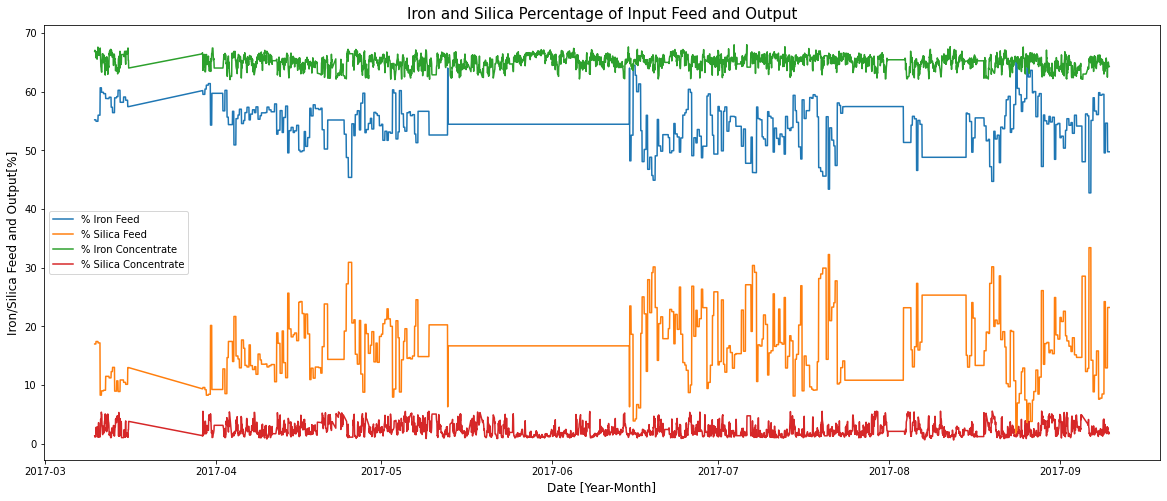

In [113]:
df = mining_data_mean.groupby('date').mean()
plt.figure(figsize = (20,8))
plt.plot(df.index, df['% Iron Feed'], label = '% Iron Feed')
plt.plot(df.index, df['% Silica Feed'], label = '% Silica Feed')
plt.plot(df.index, df['% Iron Concentrate'], label = '% Iron Concentrate')
plt.plot(df.index, df['% Silica Concentrate'], label = '% Silica Concentrate')


plt.title('Iron and Silica Percentage of Input Feed and Output', size = 15)
plt.ylabel('Iron/Silica Feed and Output[%]', size = 12)
plt.xlabel('Date [Year-Month]', size = 12)
plt.legend()
plt.show()

Imputing abnormal data with most frequent value

In [135]:
mining_data_rem3 = mining_data.copy()

In [136]:
mining_data_rem3.loc[219413:361612,'% Iron Feed'].replace(64.03, np.nan, inplace  = True)
mining_data_rem3.loc[219413:361612,'% Silica Feed'].replace(6.26, np.nan, inplace  = True)

In [137]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

mining_data_rem3['% Iron Feed'] = imputer.fit_transform(mining_data_rem3[['% Iron Feed']]) 
mining_data_rem3['% Silica Feed'] = imputer.fit_transform(mining_data_rem3[['% Silica Feed']]) 
mining_data_mos = mining_data_rem3.copy()

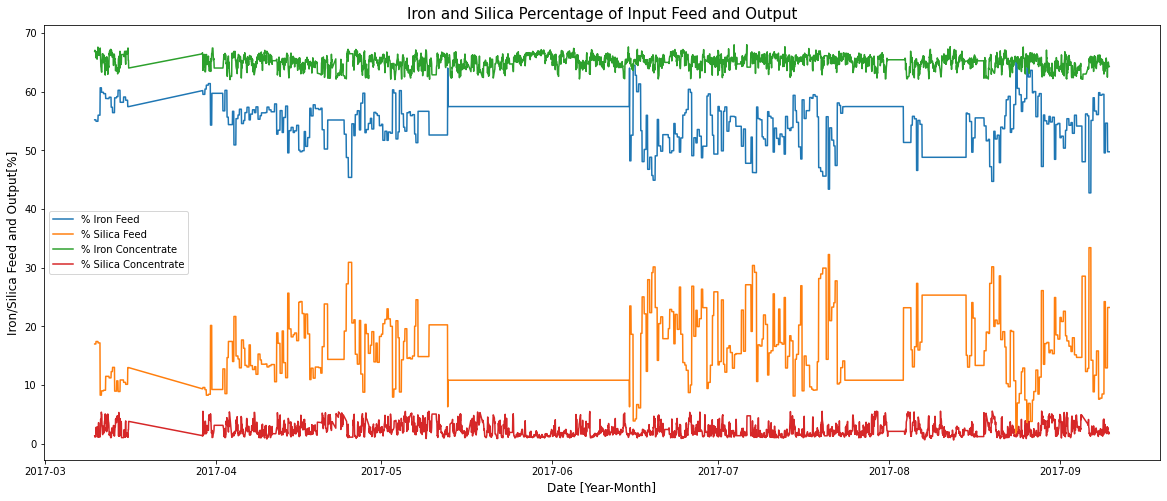

In [138]:
df = mining_data_mos.groupby('date').mean()
plt.figure(figsize = (20,8))
plt.plot(df.index, df['% Iron Feed'], label = '% Iron Feed')
plt.plot(df.index, df['% Silica Feed'], label = '% Silica Feed')
plt.plot(df.index, df['% Iron Concentrate'], label = '% Iron Concentrate')
plt.plot(df.index, df['% Silica Concentrate'], label = '% Silica Concentrate')


plt.title('Iron and Silica Percentage of Input Feed and Output', size = 15)
plt.ylabel('Iron/Silica Feed and Output[%]', size = 12)
plt.xlabel('Date [Year-Month]', size = 12)
plt.legend()
plt.show()

Imputing abnormal data with iteration median value

In [167]:
mining_data_rem4 = mining_data.copy()

In [168]:
mining_data_rem4.loc[219413:361612,'% Iron Feed'].replace(64.03, np.nan, inplace  = True)
mining_data_rem4.loc[219413:361612,'% Silica Feed'].replace(6.26, np.nan, inplace  = True)

In [169]:
imputer1 = SimpleImputer(missing_values = np.nan, strategy = 'median')

mining_data_rem4['% Iron Feed'] = imputer1.fit_transform(mining_data_rem4[['% Iron Feed']]) 
mining_data_rem4['% Silica Feed'] = imputer1.fit_transform(mining_data_rem4[['% Silica Feed']]) 
mining_data_med = mining_data_rem4.copy()

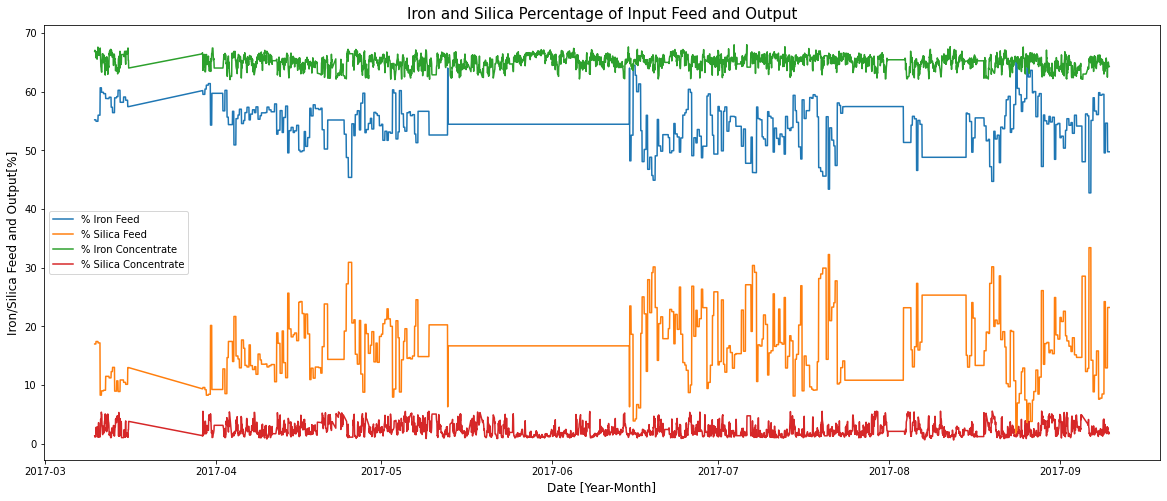

In [170]:
df = mining_data_iter.groupby('date').mean()
plt.figure(figsize = (20,8))
plt.plot(df.index, df['% Iron Feed'], label = '% Iron Feed')
plt.plot(df.index, df['% Silica Feed'], label = '% Silica Feed')
plt.plot(df.index, df['% Iron Concentrate'], label = '% Iron Concentrate')
plt.plot(df.index, df['% Silica Concentrate'], label = '% Silica Concentrate')


plt.title('Iron and Silica Percentage of Input Feed and Output', size = 15)
plt.ylabel('Iron/Silica Feed and Output[%]', size = 12)
plt.xlabel('Date [Year-Month]', size = 12)
plt.legend()
plt.show()

Imputation with mean value

In [200]:
mining_data_mean[['% Iron Feed']].describe()

,% Iron Feed
count,737453.000000
mean,54.446862
std,3.508347
min,42.740000
25%,52.670000
50%,54.446862
75%,56.650000
max,65.780000


Imputation with most frequent value

In [148]:
mining_data_mos[['% Iron Feed']].describe()

,% Iron Feed
count,737453.000000
mean,55.027873
std,3.704267
min,42.740000
25%,52.670000
50%,56.080000
75%,57.460000
max,65.780000


Imputation with median value

In [201]:
mining_data_med[['% Iron Feed']].describe()

,% Iron Feed
count,737453.000000
mean,54.586302
std,3.519927
min,42.740000
25%,52.670000
50%,55.170000
75%,56.650000
max,65.780000


#### Remove outliers and return the new data shape (rows, columns).

In [191]:
mining_data_rem_mean = mining_data_mean.copy()
mining_data_rem_mos = mining_data_mos.copy()
mining_data_rem_med = mining_data_med.copy()

In [192]:
mining_data_rem_mean = mining_data_rem_mean.drop('date', axis = 1)
mining_data_rem_mos = mining_data_rem_mos.drop('date', axis = 1)
mining_data_rem_med = mining_data_rem_med.drop('date', axis = 1)

In [193]:
#Imputation with mean value
#1st quantile - 25%
Q11 = mining_data_rem_mean.quantile(0.25)
#3rd quantile - 75%
Q31 = mining_data_rem_mean.quantile(0.75)
#Interquantile range - IQR
IQR1 = Q31 - Q11

#Imputation with most frequent value
#1st quantile - 25%
Q12 = mining_data_rem_mos.quantile(0.25)
#3rd quantile - 75%
Q32 = mining_data_rem_mos.quantile(0.75)
#Interquantile range - IQR
IQR2 = Q32 - Q12

#Imputation with median value
#1st quantile - 25%
Q13 = mining_data_rem_med.quantile(0.25)
#3rd quantile - 75%
Q33 = mining_data_rem_med.quantile(0.75)
#Interquantile range - IQR
IQR3 = Q33 - Q13

In [196]:
mining_data_rem_mean = mining_data_rem_mean[~((mining_data_rem_mean< (Q11 - 1.5 * IQR1)) | \
                                            (mining_data_rem_mean > (Q31 + 1.5 * IQR1))).any(axis=1)]
mining_data_rem_mos = mining_data_rem_mos[~((mining_data_rem_mos < (Q12 - 1.5 * IQR2)) | \
                                            (mining_data_rem_mos > (Q32 + 1.5 * IQR2))).any(axis=1)]
mining_data_rem_med = mining_data_rem_med[~((mining_data_rem_med < (Q13 - 1.5 * IQR3)) | \
                                            (mining_data_rem_med > (Q33 + 1.5 * IQR3))).any(axis=1)]

In [202]:
print(f'Imputation with mean value, data size after removing outliers: {mining_data_rem_mean.shape}')
print(f'Imputation with most frequent value, data size after removing outliers: {mining_data_rem_mos.shape}')
print(f'Imputation with median value, data size after removing outliers: {mining_data_rem_med.shape}')

Imputation with mean value, data size after removing outliers: (517723, 23)
Imputation with most frequent value, data size after removing outliers: (518769, 23)
Imputation with median value, data size after removing outliers: (517723, 23)


Use 10% of the original dataset with default configuration to set up random forest regression model. (Imputaion with mean value)

In [203]:
#Data samping
mining_data_sam_mean = mining_data_rem_mean.sample(frac = .1, replace = True)

In [204]:
y = mining_data_sam_mean['% Iron Concentrate']
x = mining_data_sam_mean.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [205]:
#Split data for training and testing, 70% training data and 30% testing data.
target = y
train = x
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [206]:
# Feature Scaling
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [211]:
#Calculate oob score
start = time()

rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)
oob_score6 = rfr.oob_score_
rfr_r2_score6 = r2_score(y_test,rfr_y_predict)

#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score6.round(3)}')
print(f'The predict R2 score is: {rfr_r2_score6.round(5)}')

'''
rfr_EV6 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE1 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE1 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE1 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE1 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV1.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE1.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE1.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE1.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE1.round(5))
'''
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.772
The predict R2 score is: 0.77613
Running time: 1 min


Use 10% of the original dataset with default configuration to set up random forest regression model. (Imputaion with most frequent value)

In [213]:
#Data samping
mining_data_sam_mos = mining_data_rem_mos.sample(frac = .1, replace = True)

In [214]:
y = mining_data_sam_mos['% Iron Concentrate']
x = mining_data_sam_mos.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [215]:
#Split data for training and testing, 70% training data and 30% testing data.
target = y
train = x
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [216]:
# Feature Scaling
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [217]:
#Calculate oob score
start = time()

rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)
oob_score7 = rfr.oob_score_
rfr_r2_score7 = r2_score(y_test,rfr_y_predict)

#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score7.round(3)}')
print(f'The predict R2 score is: {rfr_r2_score7.round(5)}')

'''
rfr_EV6 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE1 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE1 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE1 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE1 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV1.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE1.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE1.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE1.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE1.round(5))
'''
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.768
The predict R2 score is: 0.77793
Running time: 1 min


Use 10% of the original dataset with default configuration to set up random forest regression model. (Imputaion with median value)

In [218]:
#Data samping
mining_data_sam_med = mining_data_rem_med.sample(frac = .1, replace = True)

In [219]:
y = mining_data_sam_med['% Iron Concentrate']
x = mining_data_sam_med.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [220]:
#Split data for training and testing, 70% training data and 30% testing data.
target = y
train = x
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [221]:
# Feature Scaling
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [222]:
#Calculate oob score
start = time()

rfr = RandomForestRegressor(random_state = 5022, oob_score = True) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)
oob_score8 = rfr.oob_score_
rfr_r2_score8 = r2_score(y_test,rfr_y_predict)

#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score8.round(3)}')
print(f'The predict R2 score is: {rfr_r2_score8.round(5)}')

'''
rfr_EV6 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE1 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE1 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE1 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE1 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV1.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE1.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE1.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE1.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE1.round(5))
'''
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.765
The predict R2 score is: 0.78191
Running time: 1 min


In [230]:
model_eva_ran1 = pd.DataFrame({'Value':['OOB','R2'],
'Random Forest Regression 10%':[oob_score1,rfr_r2_score1],
'Random Forest Regression 10%(mean)':[oob_score6,rfr_r2_score6],
'Random Forest Regression 10%(most frequent)':[oob_score7,rfr_r2_score7],
'Random Forest Regression 10%(median)':[oob_score7,rfr_r2_score7],
                         })
model_eva_ran1.set_index(['Value'], inplace = True)

In [231]:
model_eva_ran1 = pd.DataFrame(model_eva_ran1.values.T, index=model_eva_ran1.columns, columns=model_eva_ran1.index)

In [233]:
model_eva_ran1.round(3)

Value,OOB,R2
Random Forest Regression 10%,0.827,0.839
Random Forest Regression 10%(mean)）,0.772,0.776
Random Forest Regression 10%(most frequent),0.768,0.778
Random Forest Regression 10%(median),0.768,0.778


# test

#### Remove outliers and return the new data shape (rows, columns).

In [3]:
mining_data_test = mining_data.copy()

In [5]:
mining_data_test = mining_data_test.drop('date', axis = 1)

In [6]:
#1st quantile - 25%
Q1 = mining_data_test.quantile(0.25)
#3rd quantile - 75%
Q3 = mining_data_test.quantile(0.75)
#Interquantile range - IQR
IQR = Q3 - Q1

In [7]:
mining_data_test = mining_data_test[~((mining_data_test < (Q1 - 1.5 * IQR)) | \
                                            (mining_data_test > (Q3 + 1.5 * IQR))).any(axis=1)]
print(mining_data_test.shape)

(534070, 23)


In [8]:
print('There are {:.2%} data left'.format((mining_data_test.iloc[:,0].count()/mining_data.iloc[:,0].count()).round(4)))

There are 72.42% data left


<a id='pre'></a>
### Data Prediction with Random Forest Model

#### Random Forest Regression (using original data 10%)

Optimized configuration:

n_estimators = 576\
max_depth = 41\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 18

In [96]:
mining_data_test1 = pd.read_csv('../Team Project/Datasets/converted to EXCEL-2.csv')

In [97]:
mining_data_test1.shape

(737453, 25)

In [98]:
mining_data_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [99]:
mining_data_test1 = mining_data_test1.iloc[:,:24]

In [100]:
mining_data_test1 = mining_data_test1.drop('date', axis = 1)

In [101]:
#1st quantile - 25%
Q1 = mining_data_test1.quantile(0.25)
#3rd quantile - 75%
Q3 = mining_data_test1.quantile(0.75)
#Interquantile range - IQR
IQR = Q3 - Q1

In [102]:
mining_data_test1 = mining_data_test1[~((mining_data_test1 < (Q1 - 1.5 * IQR)) | \
                                            (mining_data_test1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(mining_data_test1.shape)

(534280, 23)


In [103]:
print('There are {:.2%} data left'.format((mining_data_test1.iloc[:,0].count()/mining_data.iloc[:,0].count()).round(4)))

There are 72.45% data left


In [117]:
#Data samping
mining_data_sam = mining_data_test1.sample(frac = .1, replace = True)

In [118]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [119]:
target = y
train = x
#train = mining_data_sam_rem.drop(['% Iron Concentrate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.3)

In [120]:
# Feature Scaling

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [121]:
start = time()
rfr = RandomForestRegressor(random_state = 5022, oob_score = True)
'''
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
                            '''
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)
oob_score3 = rfr.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score3.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.74
Running time: 1 min


The train R2 score is: 0.9642
The test R2 score is: 0.74915
The R2 score is: 0.74915
The cross validation r2 score for train data is:0.73052
Running time: 11 min


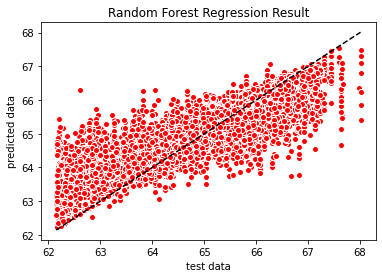

In [122]:
start = time()
'''
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)'''
#rfr_score = rfr.oob_score_
cross_val_score_rfr = cross_val_score(rfr, x_train, y_train, cv=10 ,scoring = "r2").mean()
rfr_r2_score_train3 = rfr.score(x_train, y_train)
rfr_r2_score_test3 = rfr.score(x_test,y_test)

rfr_r2_score3 = r2_score(y_test,rfr_y_predict)
plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)

plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
#print(f'The cross validation R2 score is: {cross_val_score_rfr.round(5)}')
print(f'The train R2 score is: {rfr_r2_score_train3.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test3.round(5)}')
print(f'The R2 score is: {rfr_r2_score3.round(5)}')
print(f'The cross validation r2 score for train data is:{cross_val_score_rfr.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [110]:
rfr_EV3 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE3 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE3 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE3 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE3 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV3.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE3.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE3.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE3.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE3.round(5))

RF Expained Value (EV)： 0.75798
RF Mean Absolute Error (MAE)： 0.37361
RF Median Absolute Error (medAE)： 0.2559
RF Mean Squared Error (MSE)： 0.29196
RF Rooted Mean Squared Error (RMSE)： 0.54033


#### Random Forest Regression (using original data 50%)

Optimized configuration:

n_estimators = 576\
max_depth = 41\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 18

In [204]:
#Data samping
mining_data_sam = mining_data_test.sample(frac = .5, replace = True)

In [205]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [206]:
target = y
train = x
#train = mining_data_sam_rem.drop(['% Iron Concentrate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [207]:
# Feature Scaling

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [208]:
start = time()
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)
oob_score4 = rfr.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score4.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.965
Running time: 41 min


The train R2 score is: 0.99522
The test R2 score is: 0.96462
The R2 score is: 0.96462
Running time: 0 min


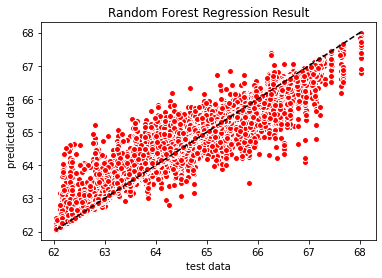

In [209]:
start = time()
'''
rfr = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr.fit(x_train,y_train)
rfr_y_predict = rfr.predict(x_test)'''
#rfr_score = rfr.oob_score_
#cross_val_score_rfr = cross_val_score(rfr, x_train, y_train, cv=10 ,scoring = "r2").mean()
rfr_r2_score4 = r2_score(y_test,rfr_y_predict)
rfr_r2_score_train4 = rfr.score(x_train, y_train)
rfr_r2_score_test4 = rfr.score(x_test,y_test)

plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
#sns.scatterplot(y_true, y_pre_linear)

plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
#print(f'The cross validation R2 score is: {cross_val_score_rfr.round(5)}')
print(f'The train R2 score is: {rfr_r2_score_train4.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test4.round(5)}')
print(f'The R2 score is: {rfr_r2_score4.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [210]:
rfr_EV4 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE4 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE4 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE4 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE4 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV4.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE4.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE4.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE4.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE4.round(5))

RF Expained Value (EV)： 0.96462
RF Mean Absolute Error (MAE)： 0.09911
RF Median Absolute Error (medAE)： 0.03077
RF Mean Squared Error (MSE)： 0.04394
RF Rooted Mean Squared Error (RMSE)： 0.20962


#### Random Forest Regression (using original data 100%)

Optimized configuration:

n_estimators = 576\
max_depth = 41\
min_samples_leaf = 1\
min_samples_split = 2\
max_features = 18

In [363]:
#Data samping
mining_data_sam = mining_data_rem.sample(frac = 1, replace = True)

In [364]:
y = mining_data_sam['% Iron Concentrate']
x = mining_data_sam.drop(['% Silica Concentrate', '% Iron Concentrate'], axis = 1)

In [365]:
target = y
train = x
#train = mining_data_sam_rem.drop(['% Iron Concentrate'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)

In [214]:
# Feature Scaling

#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [366]:
start = time()

rfr_final = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr_final.fit(x_train,y_train)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

Running time: 100 min


In [215]:
start = time()

rfr_y_predict = rfr_final.predict(x_test)
oob_score5 = rfr_final.oob_score_
#score = r2_score(y_test,rfr_y_predict)

print(f'The oob_score is: {oob_score5.round(3)}')
#print(r2_score)

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

The oob_score is: 0.986
Running time: 89 min


The train R2 score is: 0.99803
The test R2 score is: 0.98607
The R2 score is: 0.98607
Running time: 1 min


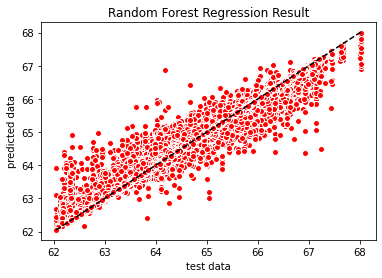

In [216]:
start = time()
'''
rfr_final = RandomForestRegressor(random_state = 5022,
                            n_estimators = 576,
                            max_depth = 41,
                            min_samples_leaf =1,
                            min_samples_split = 2,
                            max_features = 18,
                            oob_score = True ) # Random Forest Regression
rfr_final.fit(x_train,y_train)
rfr_y_predict = rfr_final.predict(x_test)'''
#rfr_score = rfr.oob_score_
#cross_val_score_rfr = cross_val_score(rfr, x_train, y_train, cv=10 ,scoring = "r2").mean()
#rfr_r2_score5 = r2_score(y_test,rfr_y_predict)
#rfr_r2_score5 = r2_score(y_test,rfr_y_predict)
#rfr_r2_score_train5 = rfr_final.score(x_train, y_train)
rfr_r2_score5 = r2_score(y_test,rfr_y_predict)
rfr_r2_score_train5 = rfr_final.score(x_train, y_train)
rfr_r2_score_test5 = rfr_final.score(x_test,y_test)

#sns.scatterplot(y_true, y_pre_linear)
plt.scatter(y_test, rfr_y_predict, c = 'red', marker = 'o', edgecolors = 'white')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'k--')
plt.title('Random Forest Regression Result')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.plot()

#print(f'The obb score is: {rfr_score.round(3)}')
#print(f'The cross validation R2 score is: {cross_val_score_rfr.round(5)}')
print(f'The train R2 score is: {rfr_r2_score_train5.round(5)}')
print(f'The test R2 score is: {rfr_r2_score_test5.round(5)}')
print(f'The R2 score is: {rfr_r2_score5.round(5)}')

stop = time()
total_time= int((stop-start)/60)
print(f'Running time: {total_time} min')

In [217]:
rfr_EV5 = explained_variance_score(y_test, rfr_y_predict)
rfr_MAE5 = mean_absolute_error(y_test, rfr_y_predict)
rfr_medAE5 = median_absolute_error(y_test,rfr_y_predict)
rfr_MSE5 = mean_squared_error(y_test, rfr_y_predict)
rfr_RMSE5 = np.sqrt(mean_squared_error(y_test, rfr_y_predict))

print('RF Expained Value (EV)：',rfr_EV5.round(5))
print('RF Mean Absolute Error (MAE)：',rfr_MAE5.round(5))
print('RF Median Absolute Error (medAE)：',rfr_medAE5.round(5))
print('RF Mean Squared Error (MSE)：',rfr_MSE5.round(5))
print('RF Rooted Mean Squared Error (RMSE)：',rfr_RMSE5.round(5))

RF Expained Value (EV)： 0.98607
RF Mean Absolute Error (MAE)： 0.05028
RF Median Absolute Error (medAE)： 0.01054
RF Mean Squared Error (MSE)： 0.01707
RF Rooted Mean Squared Error (RMSE)： 0.13067
